## QA prompt engineering and LLM parameters to match a representative sample of citizens

In [57]:
import sys
sys.path.append("../../../")

import pandas as pd

from src.eval_utils.experimenter import ExperimentRunner, Data, ModelConfig, SurveyConfig, EvalConfig
from src.data_helpers.mapper_wuw_meaning import profile_questions, energy_calculations, factors_to_be_considered_keys_flat, factors_to_be_considered_keys

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Generate Prompts

In [58]:
df_sample = pd.read_csv("../../../data/ariadne/heating_buildings/df_cata_sample_50_processed_relevant_factors_citizen_type.csv", encoding='ISO-8859-1')
df_questions = pd.read_csv("../../../data/ariadne/heating_buildings/questions_selected_survey_mapper_encoded.csv", sep=';', encoding='utf-8', on_bad_lines='skip')

In [59]:
df_questions.head(2)

,question_id,Question,option_type,exclude_values,mapping_dict
0,ges,Geschlecht,categorical,NaN,"{'1':'männlich', '2':'weiblich'}"
1,city_category,City size,ordinal,NaN,"{'1':'weniger als 20.000 Einwohner','2':'zwisc..."


### 2. Run and evaluate experiment

In [60]:
standard_entries = ['key','citizen_type'] + profile_questions + energy_calculations + factors_to_be_considered_keys_flat
df_answers = df_sample[(df_sample['citizen_type']!='defier') & (df_sample['key'].isin([806927261, 661238641, 817443461]))][standard_entries].head(10)

In [61]:
df_answers

,key,citizen_type,bundesland_name,ges,altq,city_category,so5,so1,so2,ist6,...,altru1_1,altru1_2,pk31,pk35,a7,so3_5,so6,so3_1,so3_4,so7
0,817443461,midle_complier,Freistaat Sachsen,2,52,1,12,6,13,6,...,8,9,2,2,2,0,2,1,0,3
2,806927261,never taker,Rheinland-Pfalz,1,62,1,12,4,4,7,...,2,2,1,1,1,0,2,1,0,8


In [6]:
# parameters prompt engineering
num_questions=12 
rand_question_order=factors_to_be_considered_keys
survey_context="custom_subject"
final_question="custom_subject"
final_question_prompt="TA"
rand_order_options=False
prompts_directory="../../../data/ariadne/heating_buildings/experiment_1/prompts"

# parameters run estimations
n_trials = 3
n_iter = 1
model = "gpt-3.5-turbo"  #"gpt-4"#"babbage-002"

# parameters for evaluation
mapper = {'A': 1, 'B': 2}
final_columns = ['ea801', 'ea802', 'ea803', 'ea804', 'ea805', 'ea806', 'ea807', 'ea808', 'ea809', 'ea810', 'ea811', 
               'ea812', 'ea813', 'ea814', 'ea815']

data = Data(df_questions, df_answers)
model_config = ModelConfig(model, n_trials)
survey_config = SurveyConfig(n_iter, num_questions, rand_question_order, survey_context, final_question, final_question_prompt, rand_order_options)
eval_config = EvalConfig(mapper, final_columns)

In [9]:
exp_run = ExperimentRunner(data=data, model_config=model_config, survey_config=survey_config, eval_config=eval_config)
exp_run.generate_prompts()
exp_run.store_prompts(directory=prompts_directory)

Interviewer: Sie sind Eigentümer eines Hauses und haben die Kontrolle über Entscheidungen bezüglich der Heizung und Sie besitzen eine Zentralheizung und Ihre Immobilie wurde 1984 bis 1994 gebaut. Bitte erzählen Sie uns ein wenig über sich selbst.

Ich: Ich bin ein 56 Jahre alter Mann und ich wohne in einer Stadt mit weniger als 20.000 Einwohnern in Freistaat Bayern. Zusätzlich, mein Einkommensniveau beträgt 5.700 Euro und mehr pro Monat und mein höchster Bildungsabschluss ist Berufsakademie, Fachakademie.
Interviewer: Wie viele Personen, also Erwachsene und Kinder (inkl. Sie selbst), wohnen derzeit in Ihrem Haushalt?
Ich: NUMFELD 2

Interviewer: In welcher Art von Gebäude befindet sich die Wohnung?
Bitte wählen Sie nur eine der folgenden Optionen mit dem dazugehörigen Buchstaben aus.
(a) freistehendes Ein-/ Zweifamilienhaus (b) Reihen-/Doppelhaus (c) in einem Mehrfamilienhaus (bis zu sieben Stockwerke) (d) in einem Hochhaus (acht oder mehr Stockwerke) (e) in einem (ehemaligen und / ode

In [90]:
temperature = 0.6#, 0.5, 0.7, 1.0]
top_p = 1.0
max_tokens = 100
output_file = f"../../../data/ariadne/heating_buildings/experiment_1/{model}-t_{temperature}_qa.csv"
exp_run.run_experiment(output_file, temperature, top_p, max_tokens)

Iteration 0 for prompt index 0.
{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "message": {
        "content": "1. (A)\n2. (A)\n3. (A)\n4. (A)\n5. (A)\n6. (A)\n7. (A)\n8. (A)\n9. (A)\n10. (A)\n11. (A)\n12. (A)\n13. (A)\n14. (A)\n15. (A)",
        "role": "assistant"
      }
    }
  ],
  "created": 1703801296,
  "id": "chatcmpl-8asq0JJPsmRotKtLwHMk3REUla0Bs",
  "model": "gpt-3.5-turbo-0613",
  "object": "chat.completion",
  "system_fingerprint": null,
  "usage": {
    "completion_tokens": 75,
    "prompt_tokens": 3077,
    "total_tokens": 3152
  }
}
Success!!
hello
hello2
hello3
<_io.TextIOWrapper name='../../../data/ariadne/heating_buildings/experiment_1/20231228_2308/gpt-3.5-turbo-t_0.6_qa.csv' mode='w' encoding='utf-8'>
hello4
Iteration 0 for prompt index 1.
{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "message": {
        "content": "1. (B)\n2. (B)\n3. (B)\n4. (B)\n5. (B)\

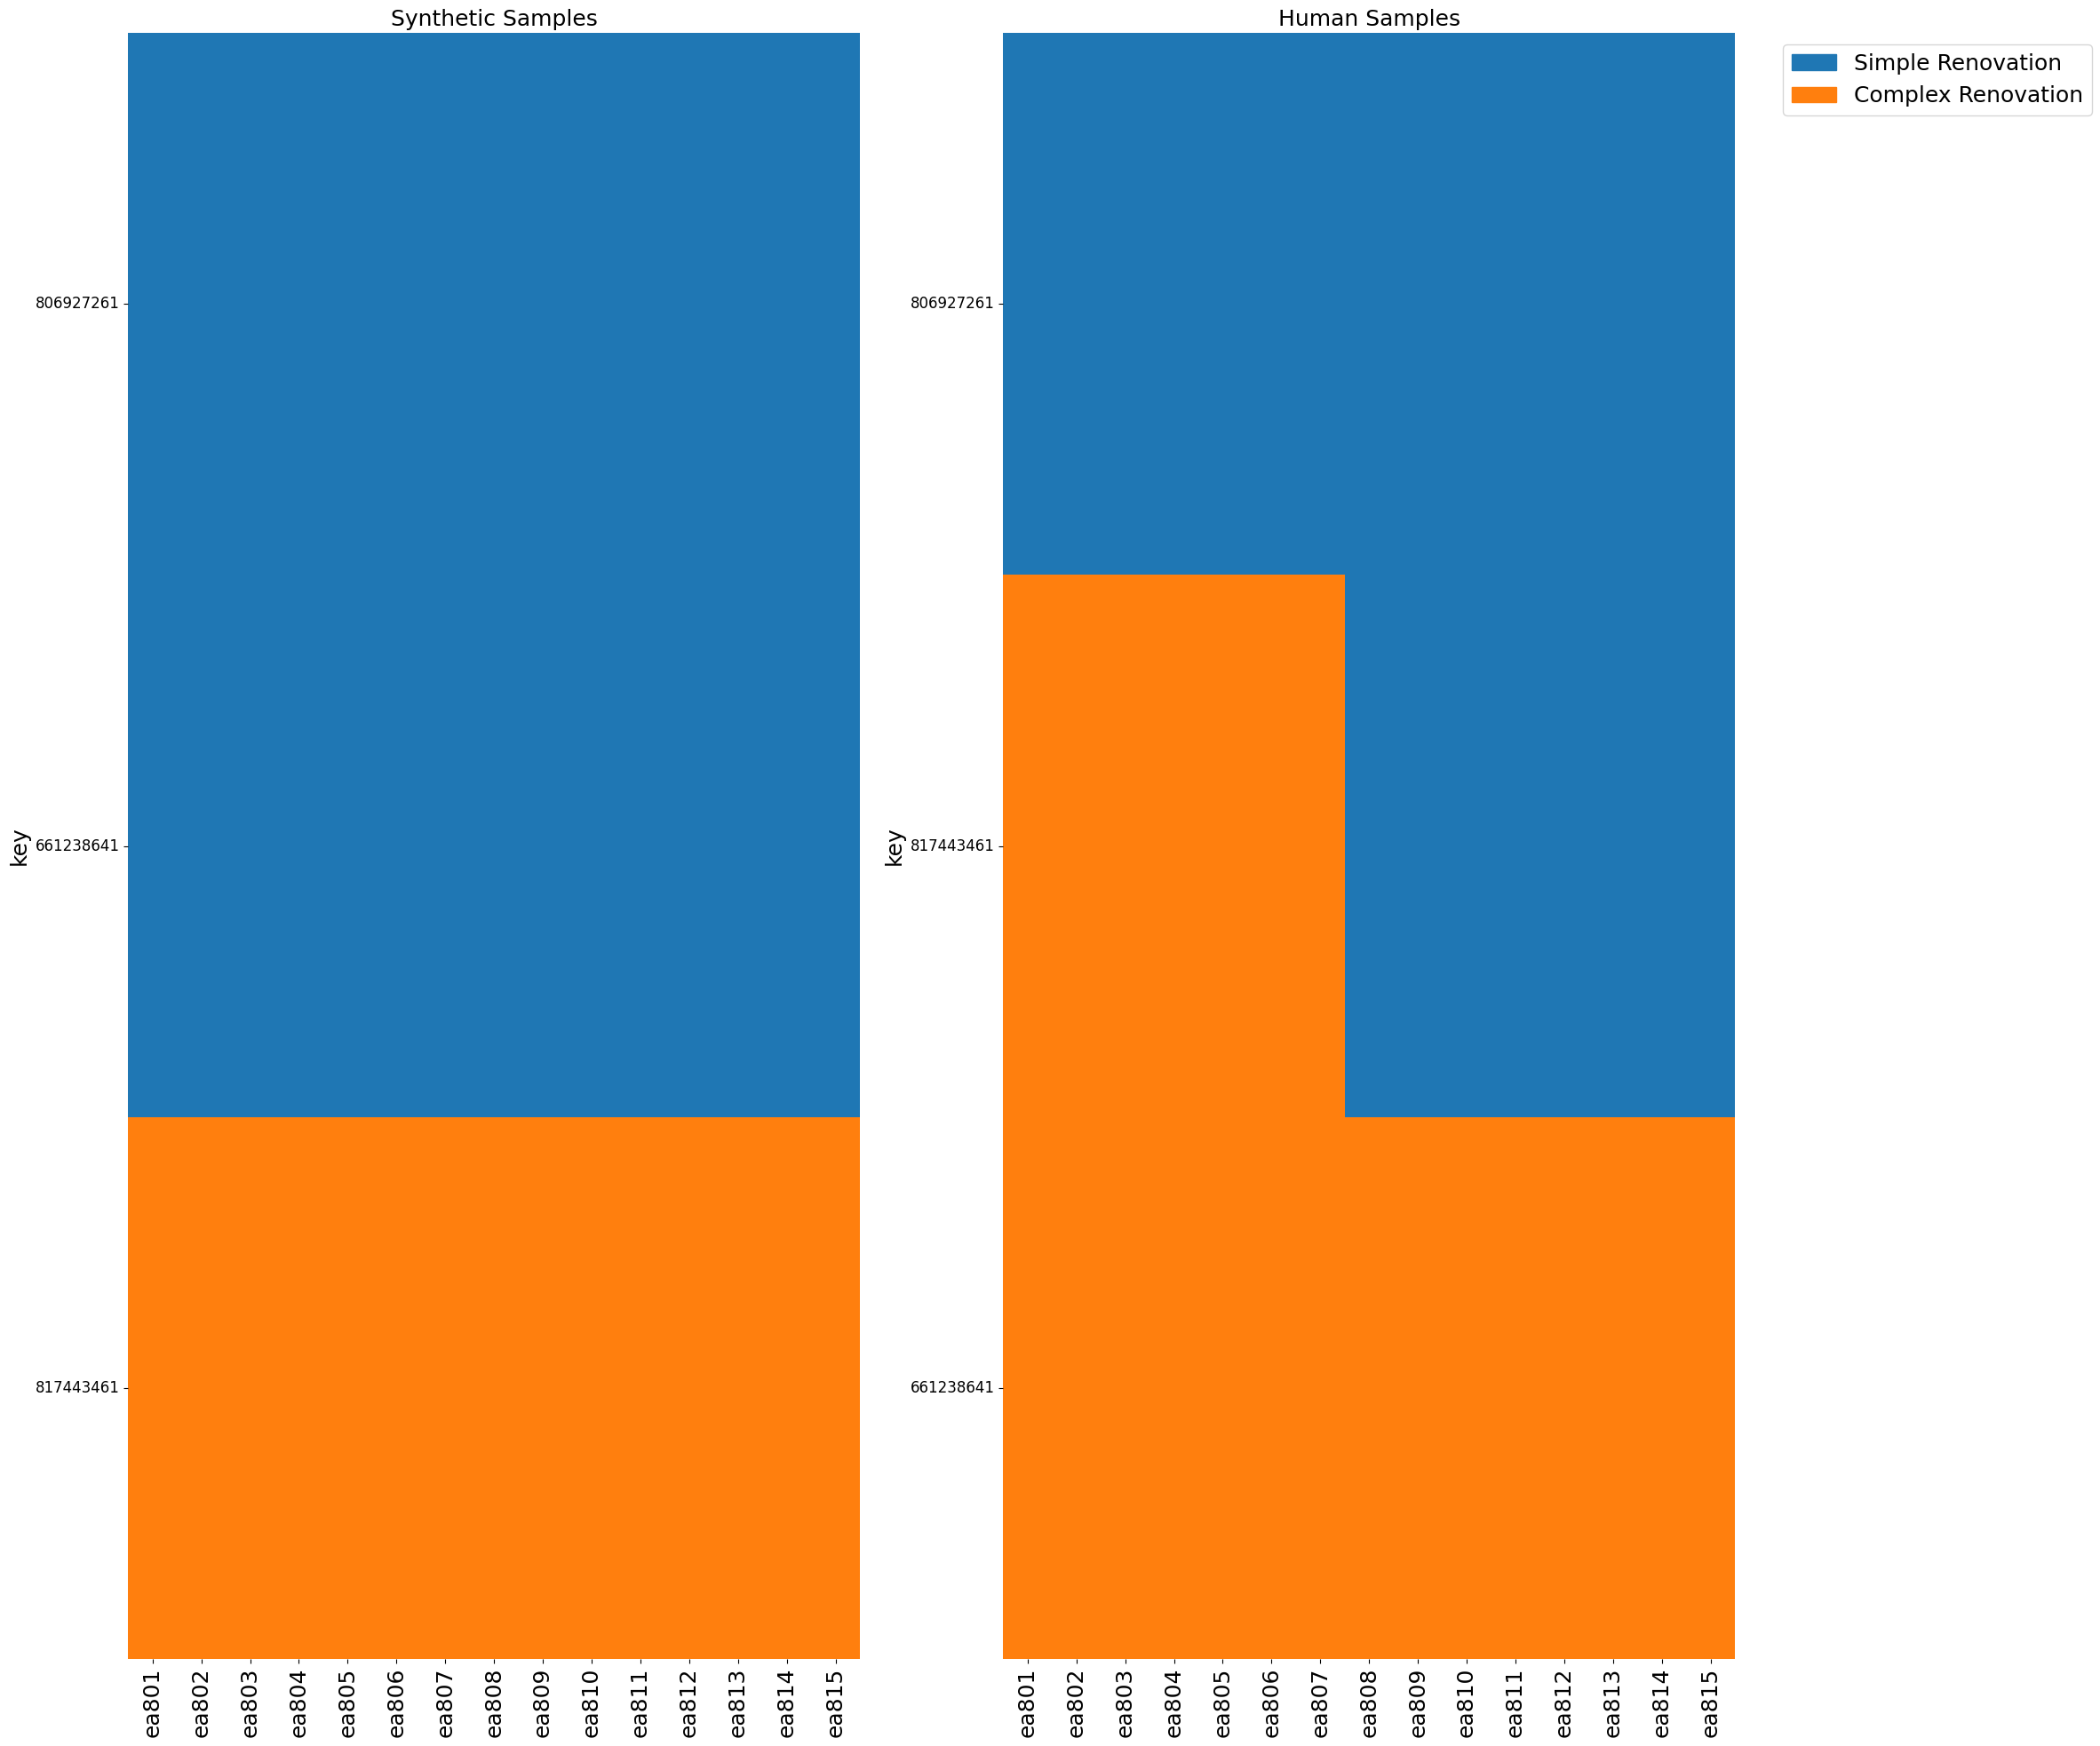

In [91]:
df_human_sample = df_sample[(df_sample['citizen_type']!='defier') & (df_sample['key'].isin([806927261, 661238641, 817443461]))].head(10)[['key']+final_columns]
output_file = '../../../data/ariadne/heating_buildings/experiment_1/20231228_2308/gpt-3.5-turbo-t_0.6_qa.csv'
df_synthetic_samples = pd.read_csv(output_file)
df_synthetic_samples = df_synthetic_samples[(df_synthetic_samples['iter']==0)&(df_synthetic_samples['temperature']==temperature)]
exp_run.compare_results(df_human_sample, df_synthetic_samples)

### 3. Run a recurrent experiment and analyse the results --> Temperatures 0.5 and 0.7 best results

**Observations**
* Temperatures 0.1 or 1.0 generate more inconsistent results further away from the real behavior.
* The capacity to reason in the reflection prompt generated is not customized per profile but repeats itself across profiles.

In [50]:
temperature = [0.5, 0.7] #[0.1, 0.5, 0.7, 1.0]
top_p = 1.0
max_tokens = 100
n_iter = 3

data = Data(df_questions, df_answers)
model_config = ModelConfig(model, n_trials)
survey_config = SurveyConfig(n_iter, num_questions, rand_question_order, survey_context, final_question, final_question_prompt, rand_order_options)
eval_config = EvalConfig(mapper, final_columns)

additional_sentence = """Interviewer: Bitte entscheiden sich nun für die verschiedenen Optionen. Halten Sie Ihre Antworten in einer nummerierten Liste organisiert: '1. (Option Buchstabe) 2. (Option Buchstabe) 3. (Option Buchstabe) usw.\nIch:"""
for temp in temperature:
    output_file = f"../../../data/ariadne/heating_buildings/experiment_1/recurrent_{model}-t_{temp}_qa.csv"
    exp_run = ExperimentRunner(data=data, model_config=model_config, survey_config=survey_config, eval_config=eval_config)
    exp_run.generate_prompts()
    exp_run.store_prompts(directory=prompts_directory)
    exp_run.run_recurrent_experiment(output_file, temp, top_p, max_tokens, additional_sentence)

Interviewer: Sie sind Eigentümer eines Hauses und haben die Kontrolle über Entscheidungen bezüglich der Heizung und Sie besitzen eine Zentralheizung und Ihre Immobilie wurde 1984 bis 1994 gebaut. Bitte erzählen Sie uns ein wenig über sich selbst.

Ich: Ich bin ein 56 Jahre alter Mann und ich wohne in einer Stadt mit weniger als 20.000 Einwohnern in Freistaat Bayern. Zusätzlich, mein Einkommensniveau beträgt 5.700 Euro und mehr pro Monat und mein höchster Bildungsabschluss ist Berufsakademie, Fachakademie.
Interviewer: Wie viele Personen, also Erwachsene und Kinder (inkl. Sie selbst), wohnen derzeit in Ihrem Haushalt?
Ich: NUMFELD 2

Interviewer: In welcher Art von Gebäude befindet sich die Wohnung?
Bitte wählen Sie nur eine der folgenden Optionen mit dem dazugehörigen Buchstaben aus.
(a) freistehendes Ein-/ Zweifamilienhaus (b) Reihen-/Doppelhaus (c) in einem Mehrfamilienhaus (bis zu sieben Stockwerke) (d) in einem Hochhaus (acht oder mehr Stockwerke) (e) in einem (ehemaligen und / ode

#### 3.1.1. Results temperature 0.1 iteration 1

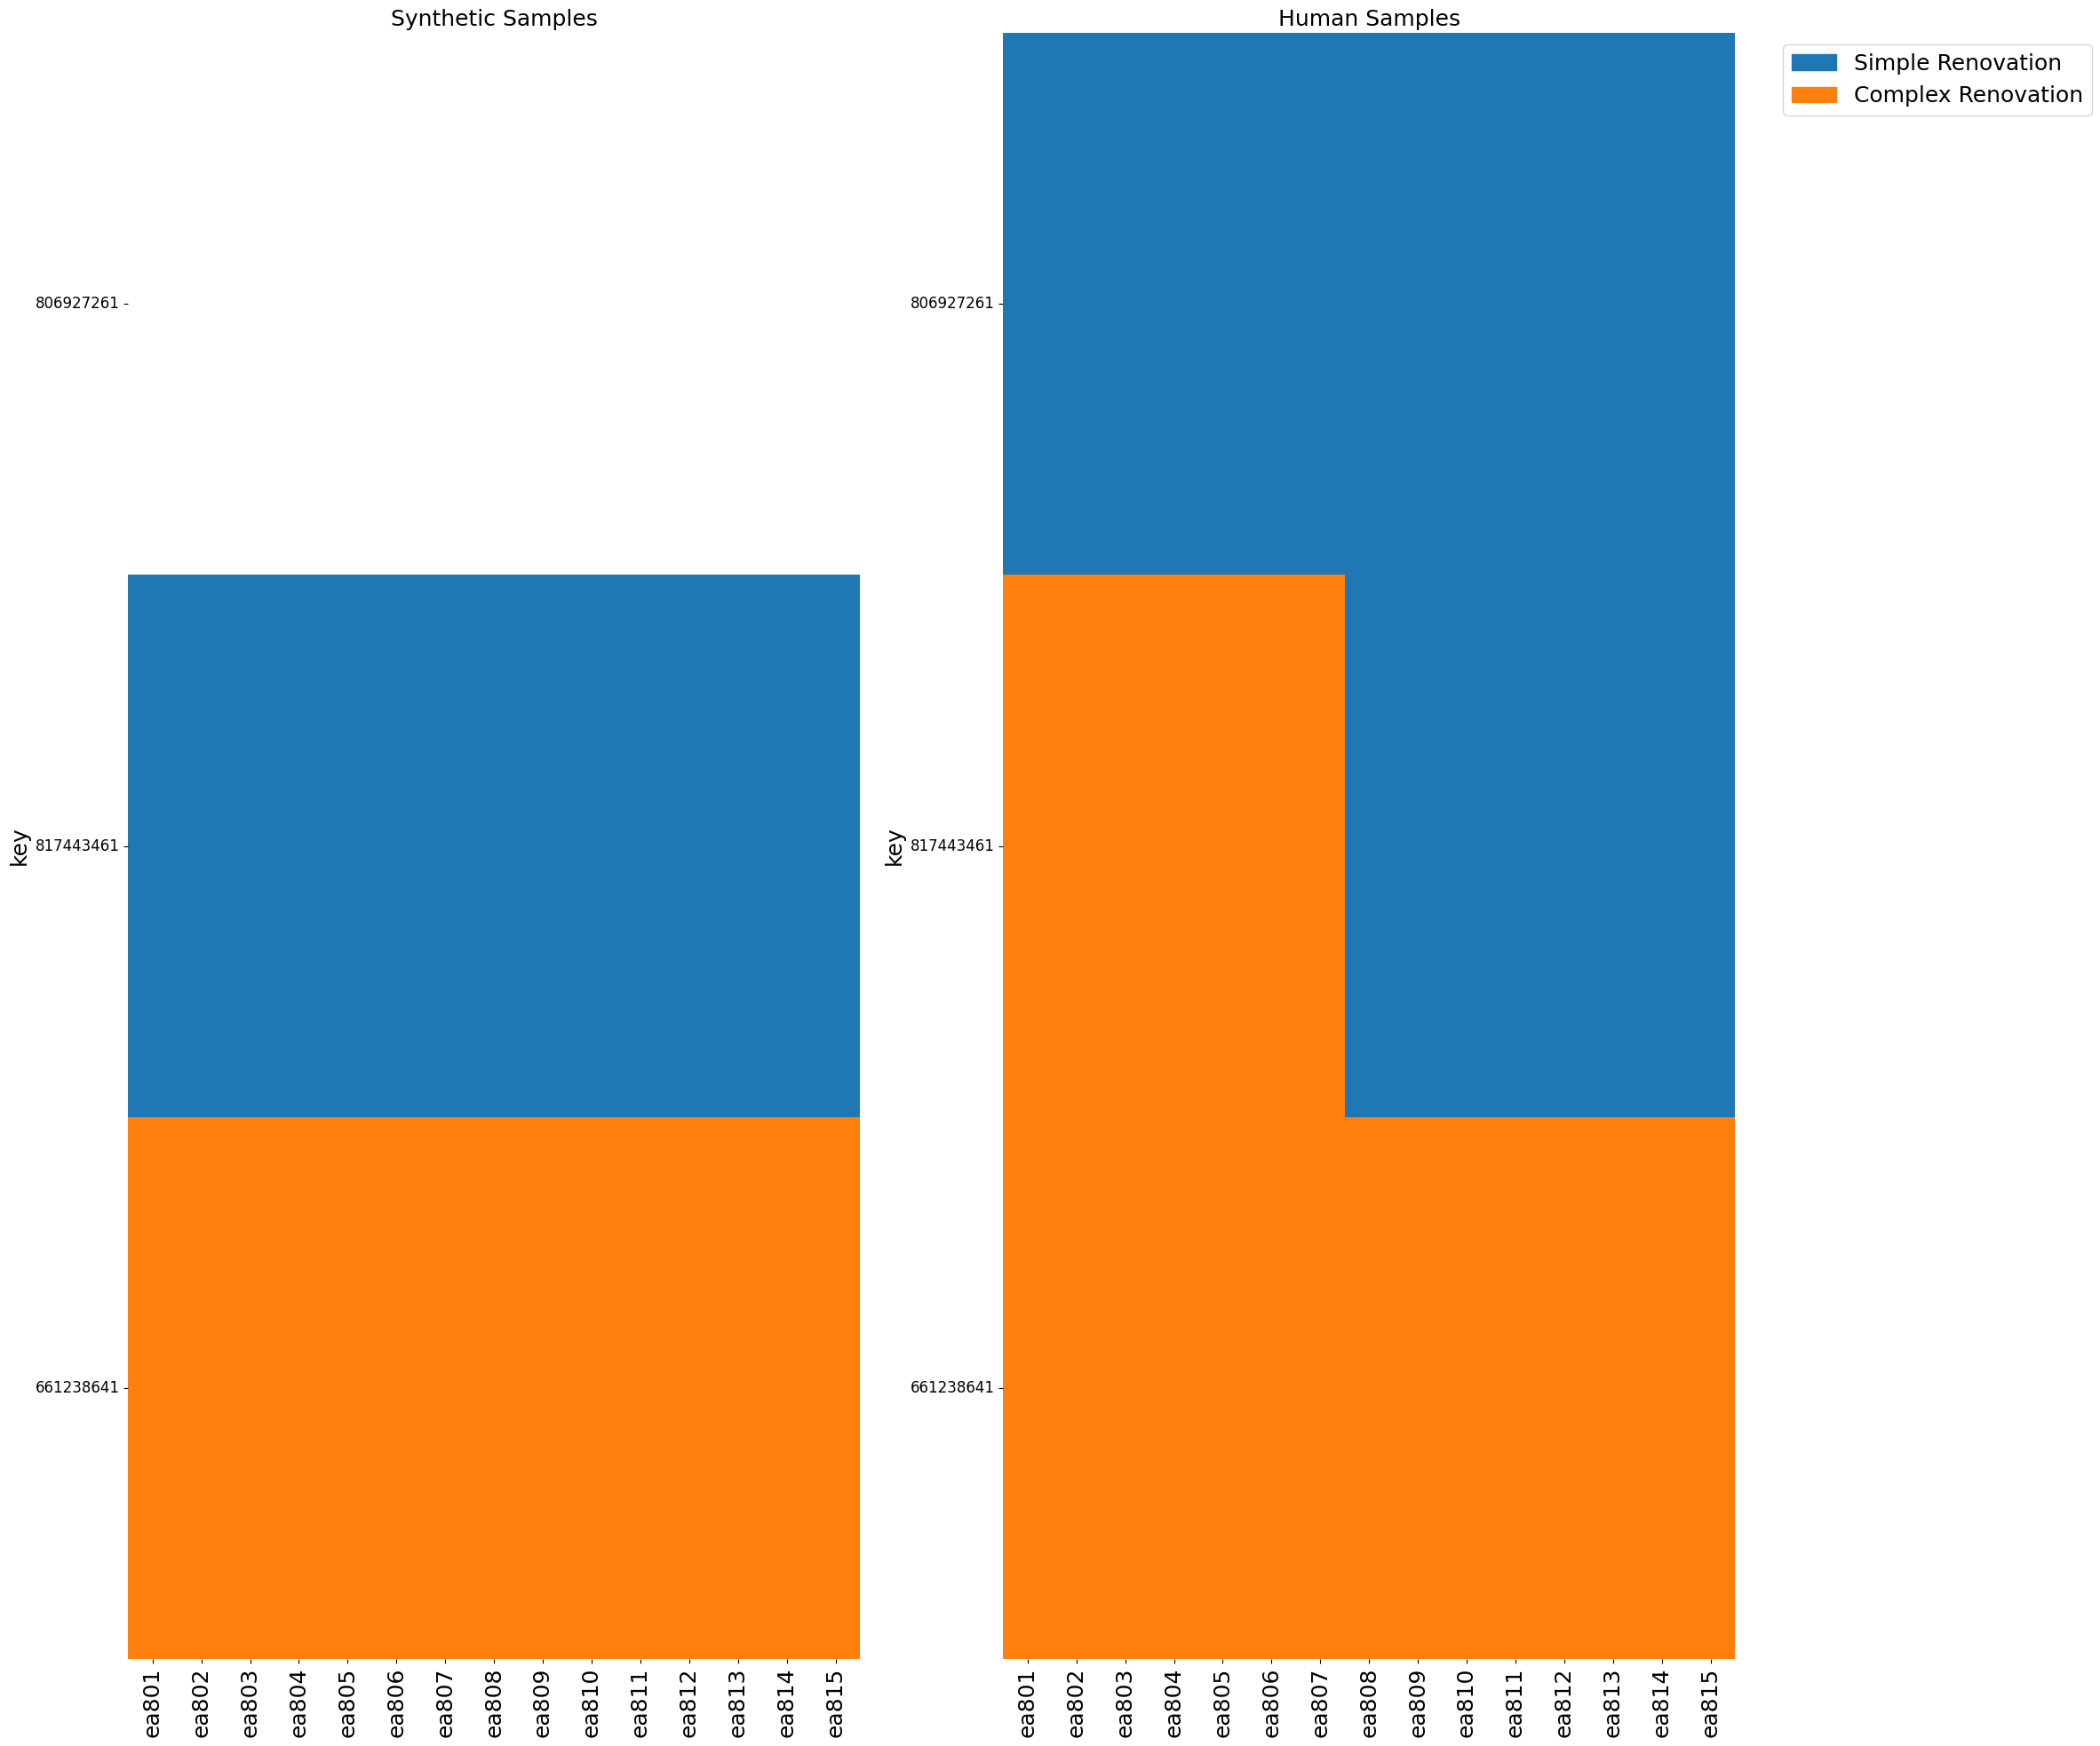

In [11]:
df_human_sample = df_sample[(df_sample['citizen_type']!='defier') & (df_sample['key'].isin([806927261, 661238641, 817443461]))].head(10)[['key']+final_columns]
output_file = '../../../data/ariadne/heating_buildings/experiment_1/20231229_1302/recurrent_gpt-3.5-turbo-t_0.1_qa.csv'
df_synthetic_samples = pd.read_csv(output_file)
df_synthetic_samples = df_synthetic_samples[(df_synthetic_samples['iter']==0)&(df_synthetic_samples['temperature']==0.1)][['key']+final_columns]
exp_run.compare_results(df_human_sample, df_synthetic_samples)

#### 3.1.2. Results temperature 0.1 iteration 2

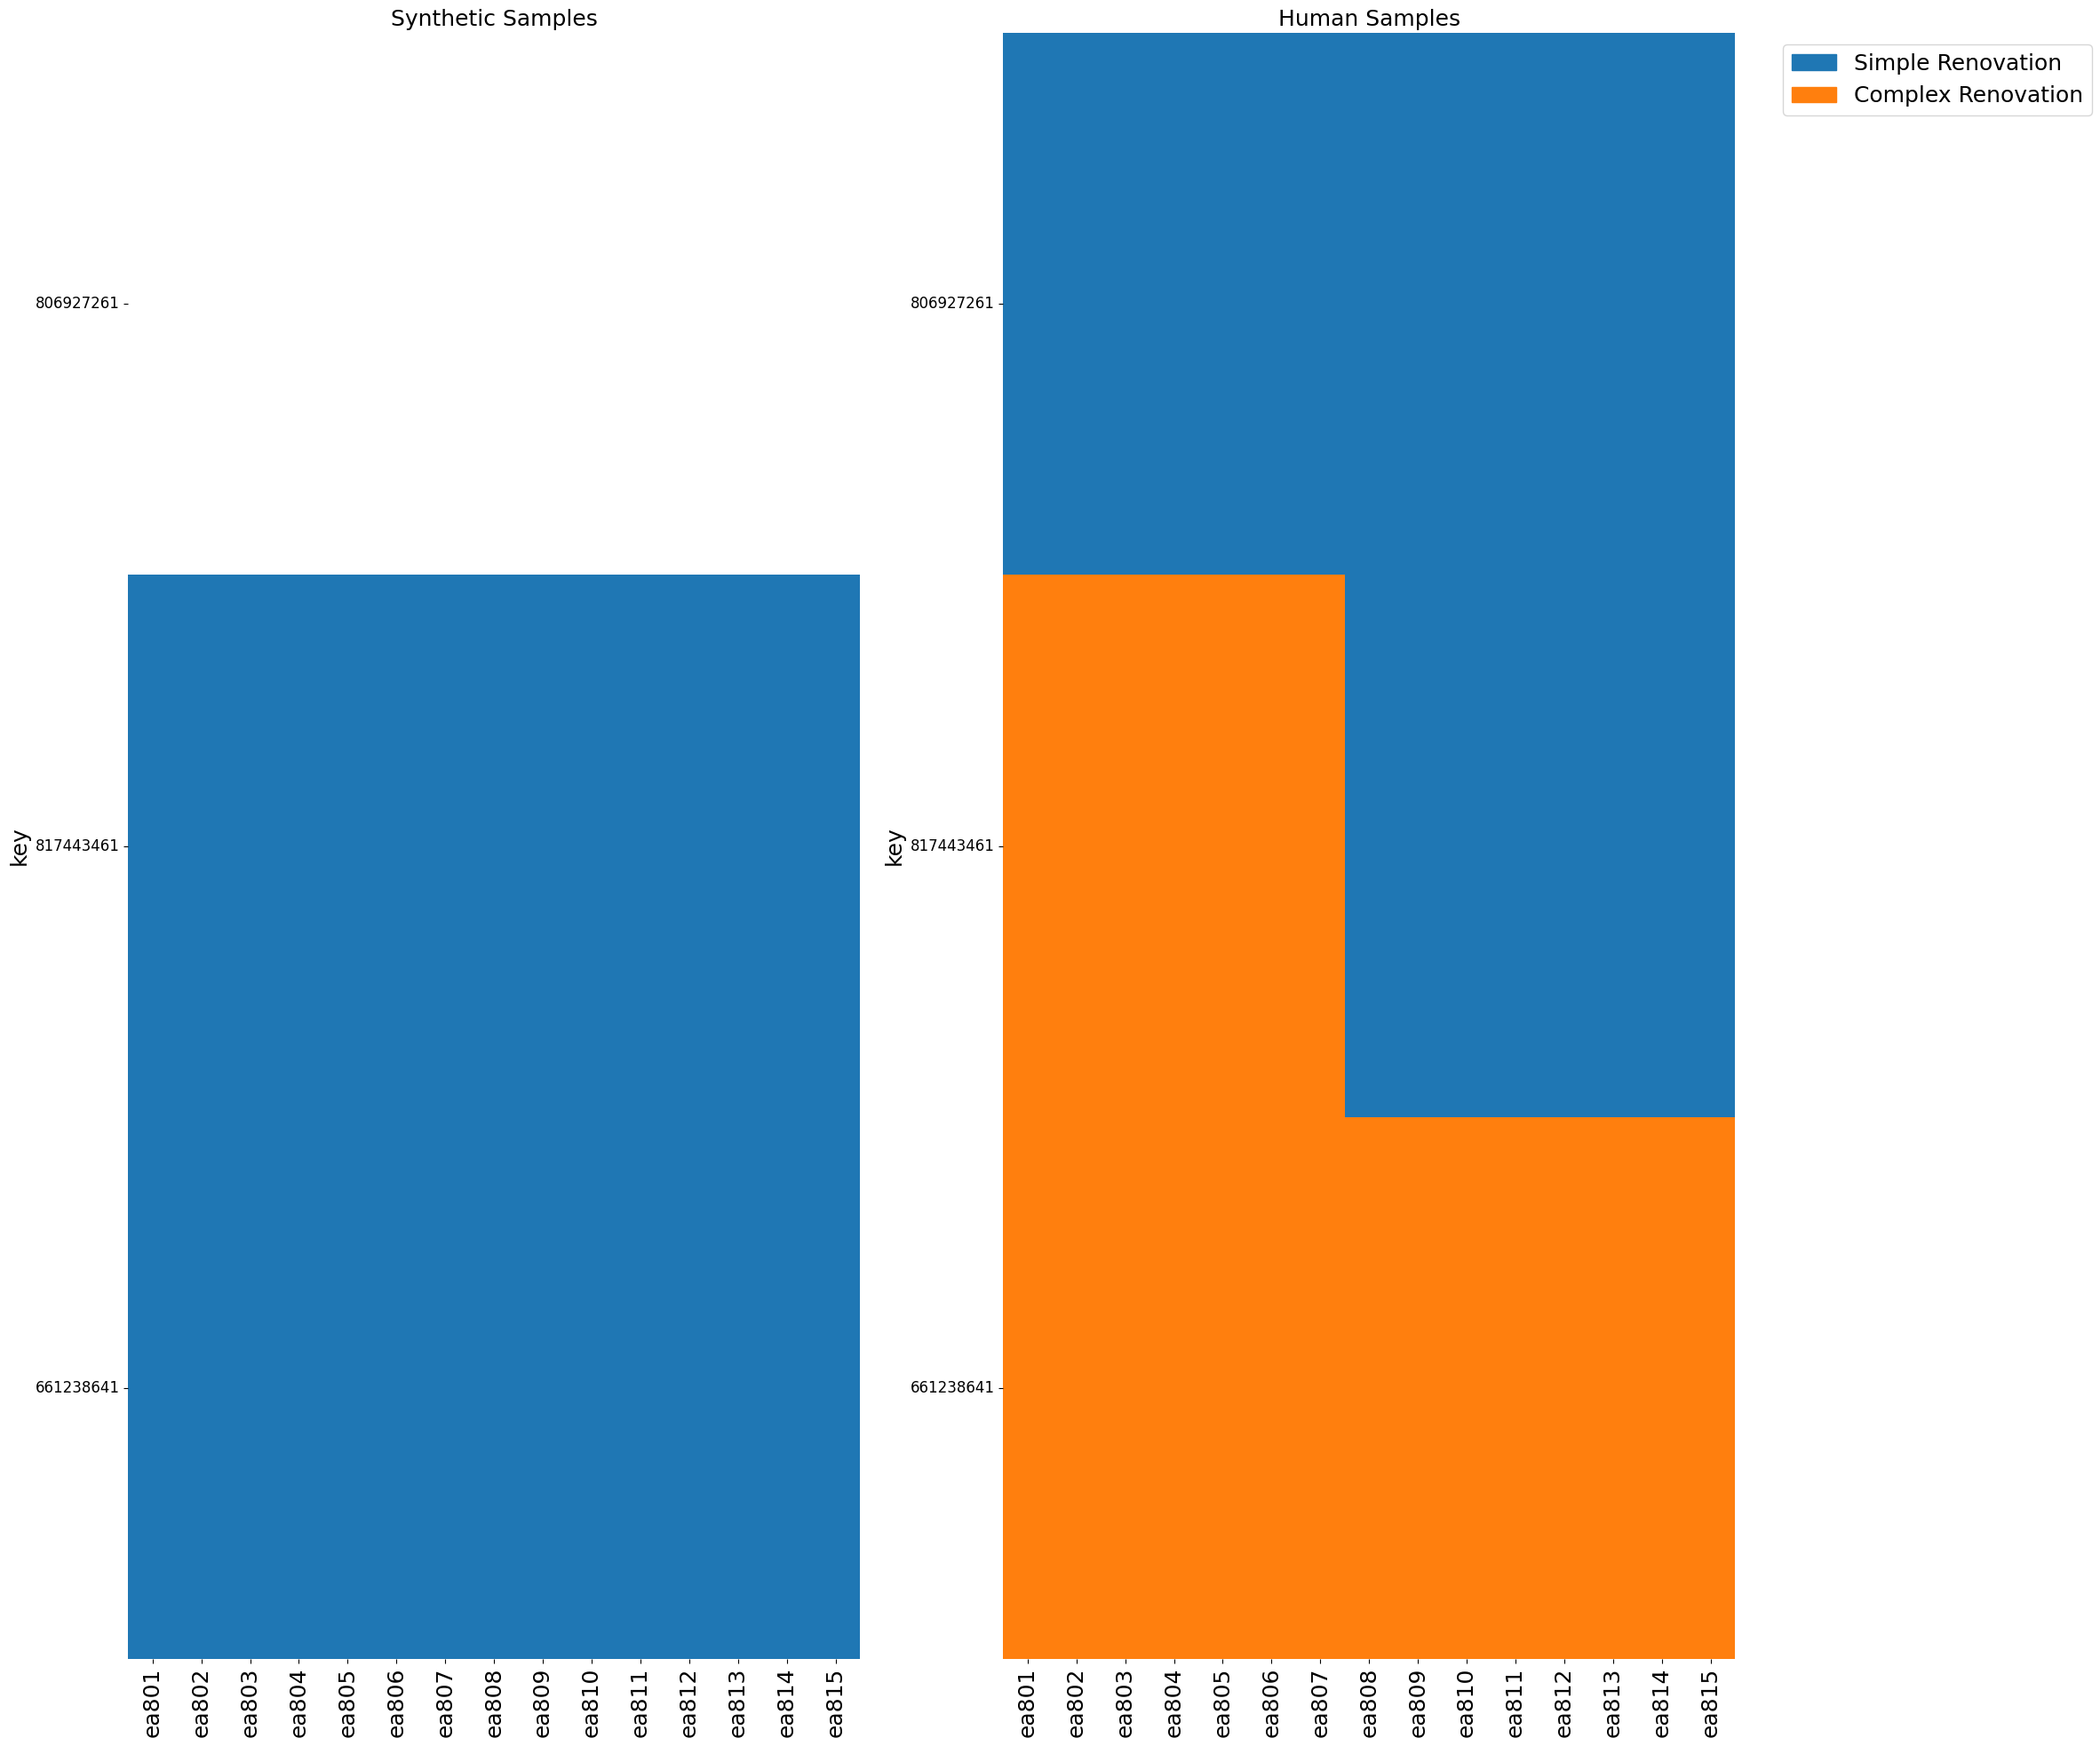

In [10]:
df_human_sample = df_sample[(df_sample['citizen_type']!='defier') & (df_sample['key'].isin([806927261, 661238641, 817443461]))].head(10)[['key']+final_columns]
output_file = '../../../data/ariadne/heating_buildings/experiment_1/20231229_1302/recurrent_gpt-3.5-turbo-t_0.1_qa.csv'
df_synthetic_samples = pd.read_csv(output_file)
df_synthetic_samples = df_synthetic_samples[(df_synthetic_samples['iter']==1)&(df_synthetic_samples['temperature']==0.1)][['key']+final_columns]
exp_run.compare_results(df_human_sample, df_synthetic_samples)

#### 3.1.3. Results temperature 0.1 iteration 3

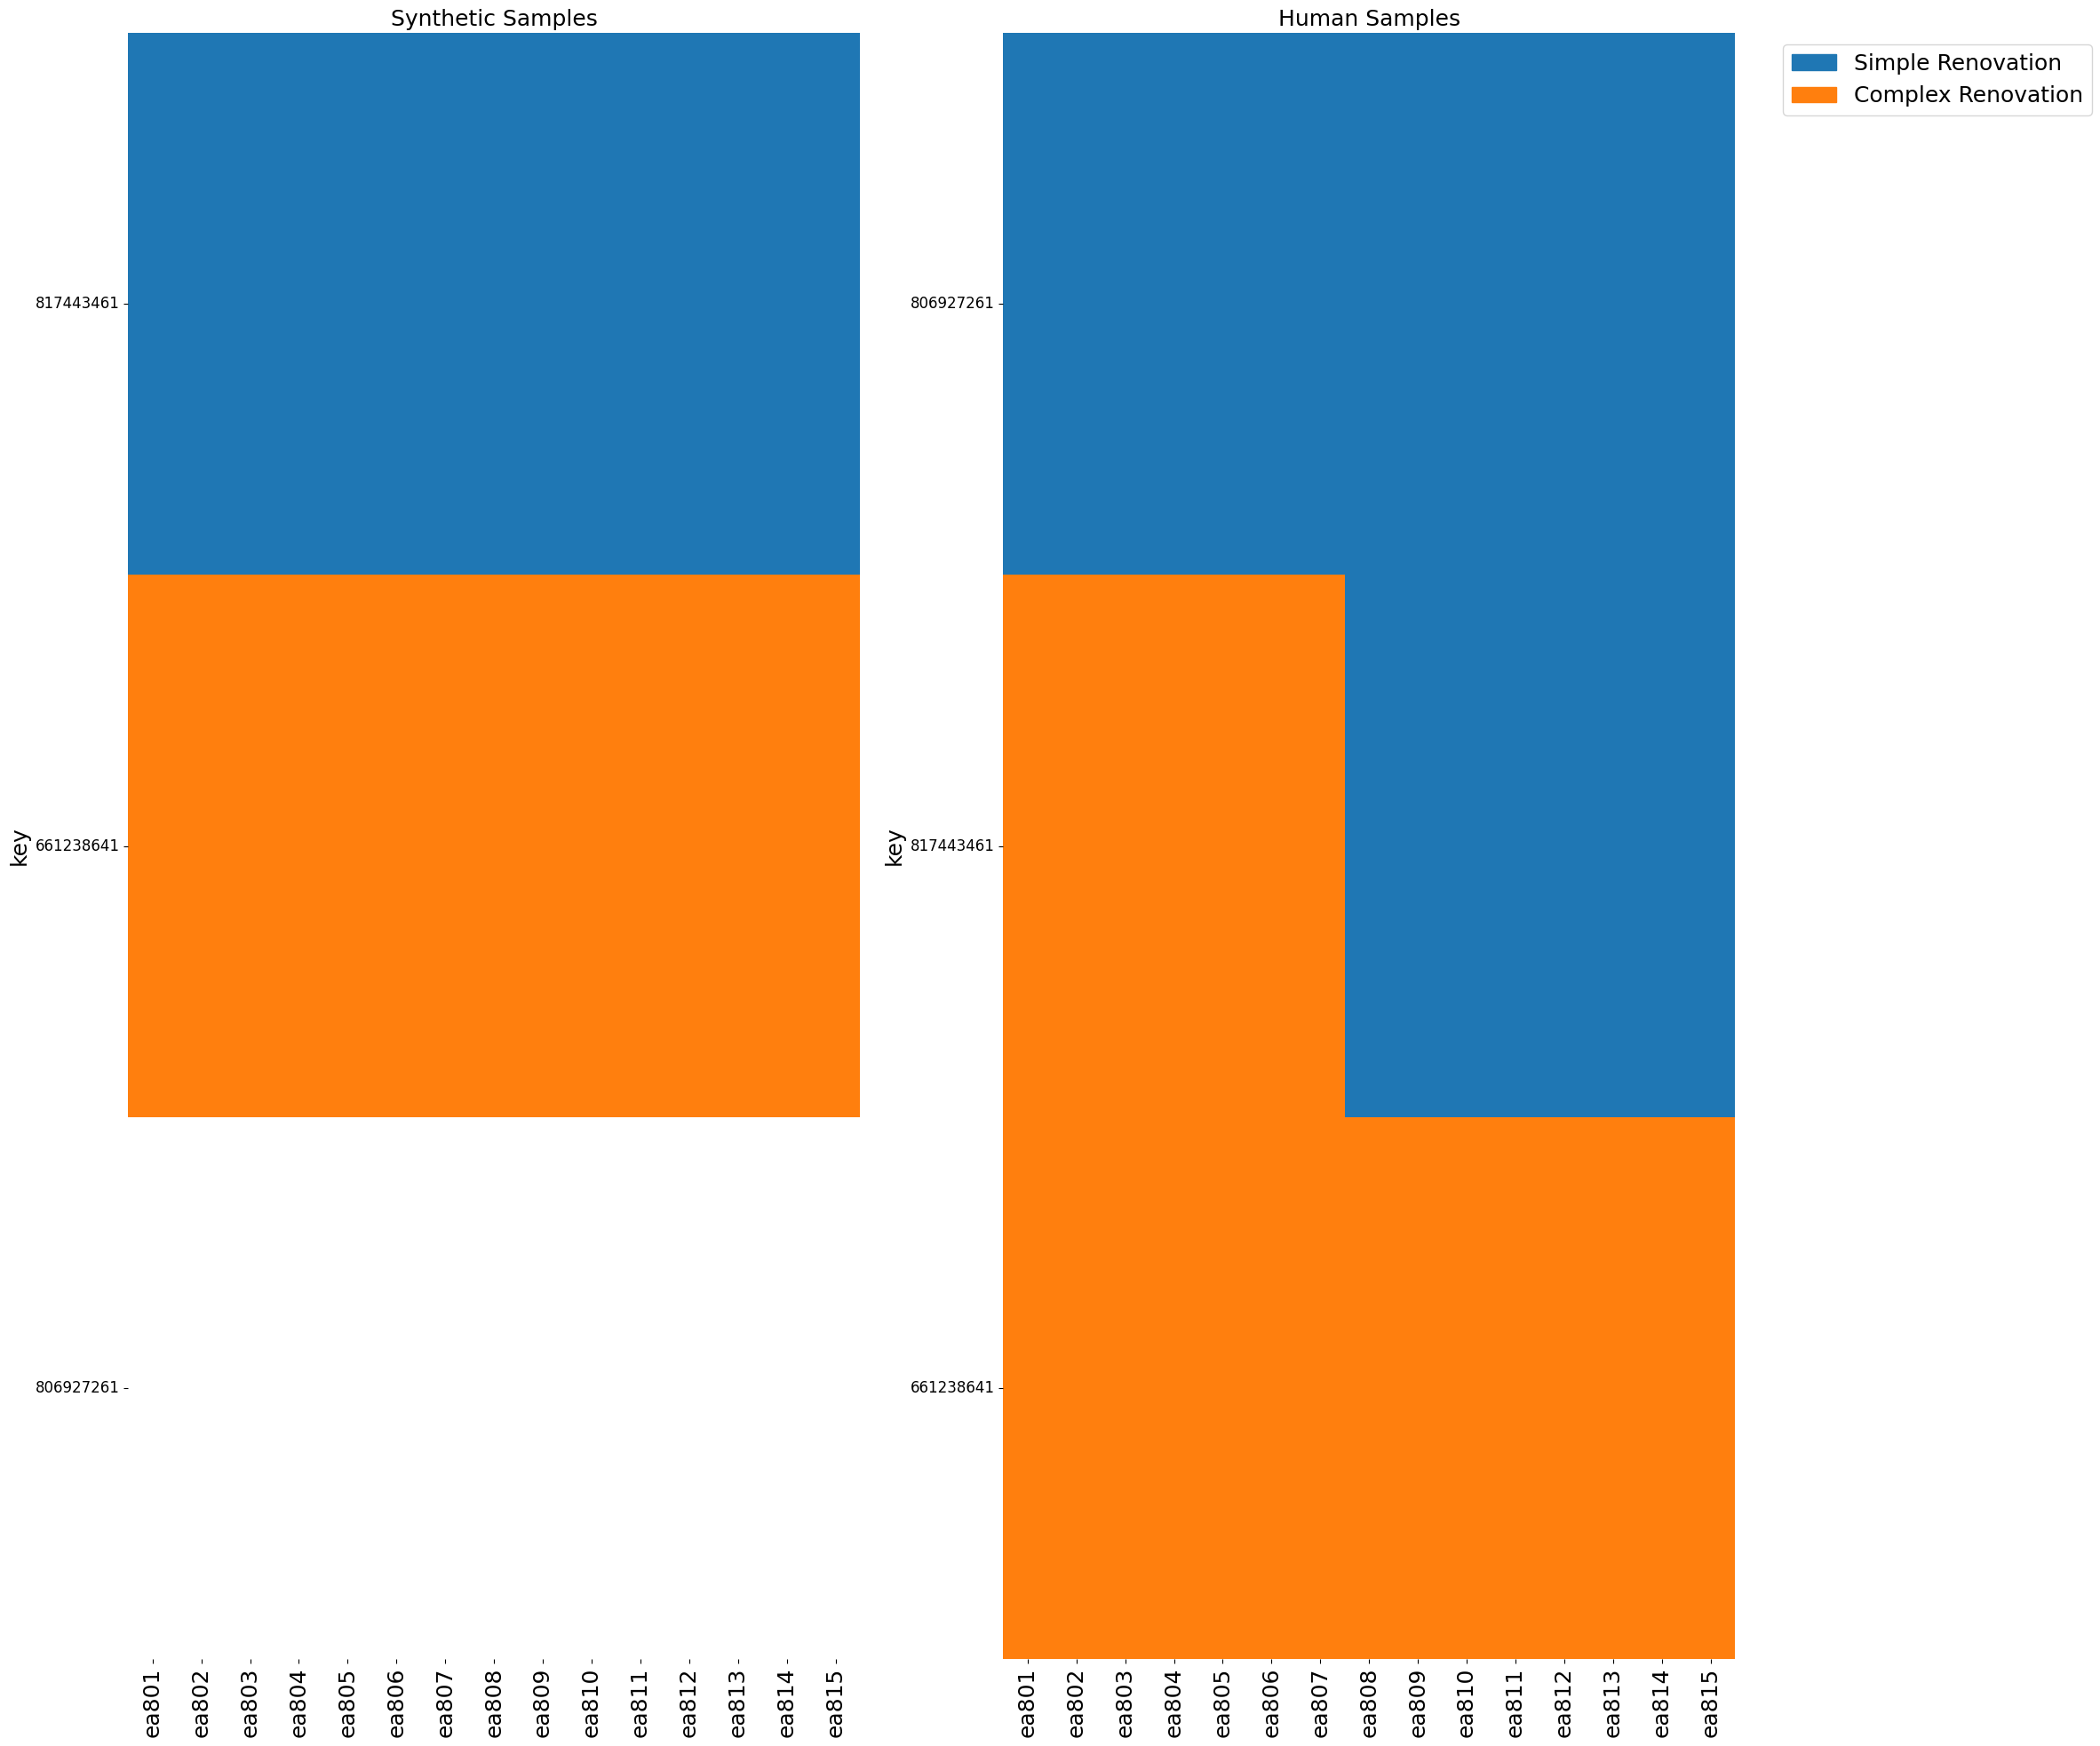

In [40]:
df_human_sample = df_sample[(df_sample['citizen_type']!='defier') & (df_sample['key'].isin([806927261, 661238641, 817443461]))].head(10)[['key']+final_columns]
output_file = '../../../data/ariadne/heating_buildings/experiment_1/20231229_1302/recurrent_gpt-3.5-turbo-t_0.1_qa.csv'
df_synthetic_samples = pd.read_csv(output_file)
df_synthetic_samples = df_synthetic_samples[(df_synthetic_samples['iter']==2)&(df_synthetic_samples['temperature']==0.1)][['key']+final_columns]
exp_run.compare_results(df_human_sample, df_synthetic_samples)

#### 3.2.1. Results temperature 0.5 iteration 1

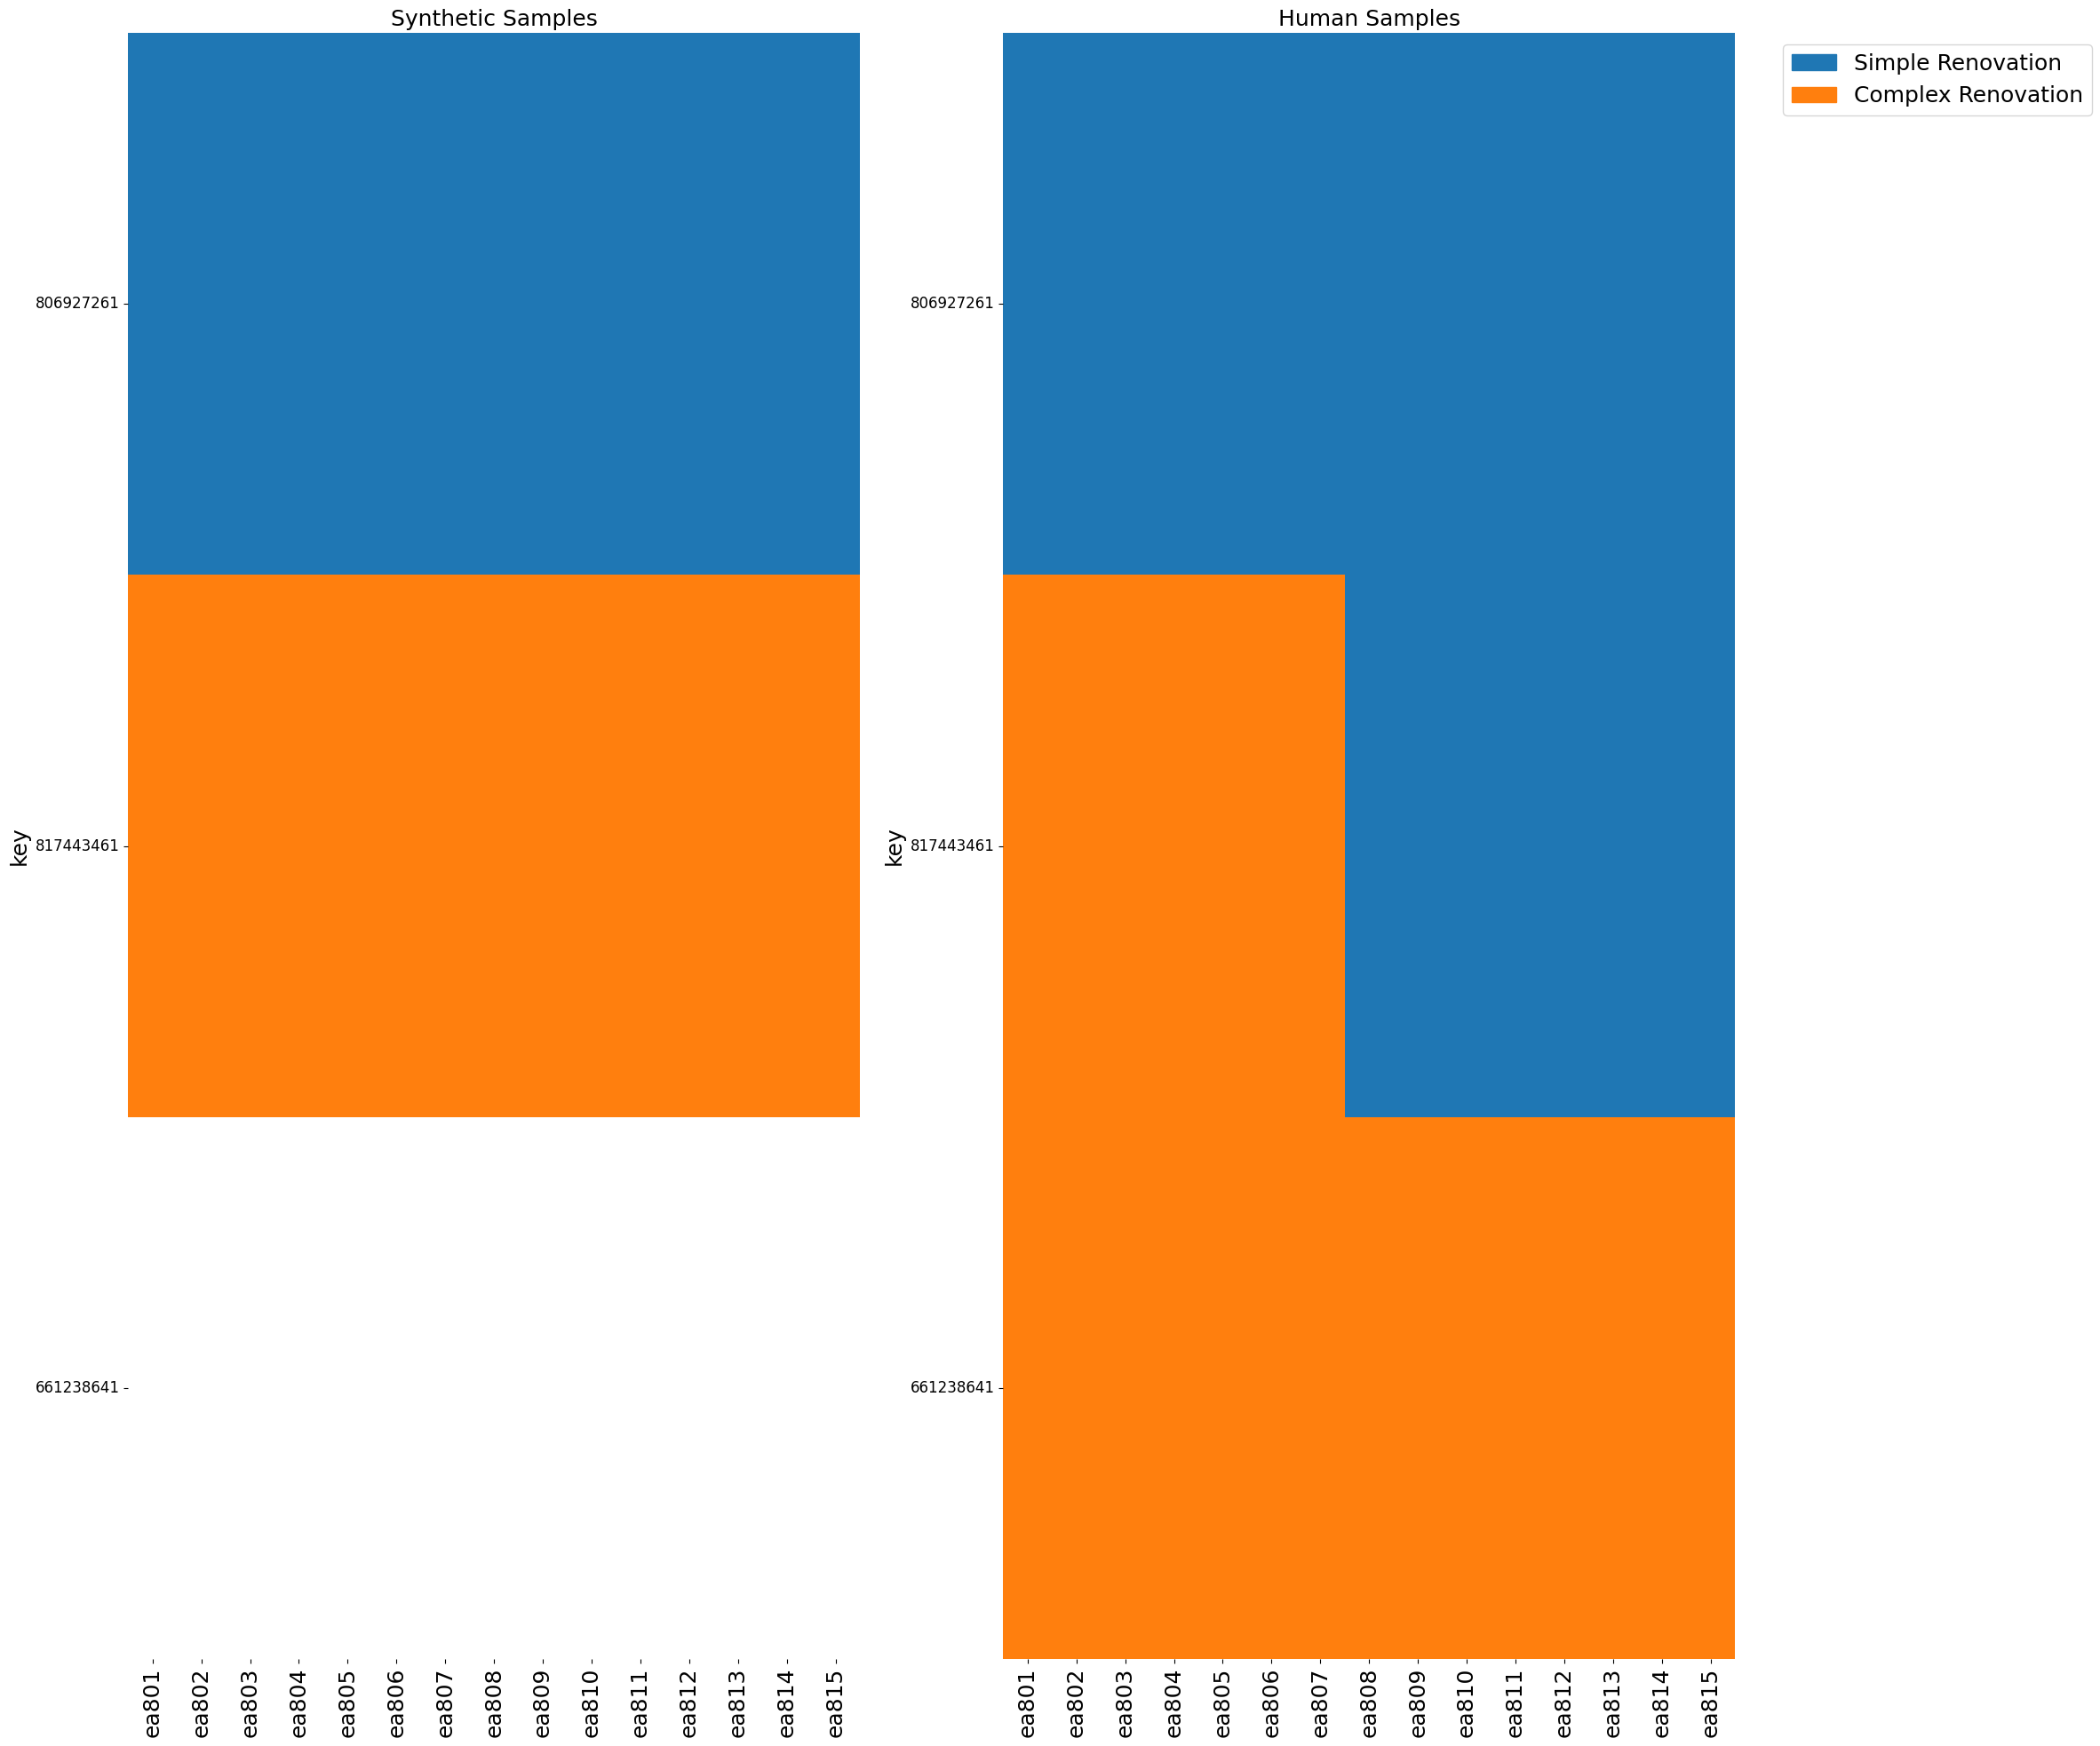

In [54]:
df_human_sample = df_sample[(df_sample['citizen_type']!='defier') & (df_sample['key'].isin([806927261, 661238641, 817443461]))].head(10)[['key']+final_columns]
output_file = '../../../data/ariadne/heating_buildings/experiment_1/20231230_1738/recurrent_gpt-3.5-turbo-t_0.5_qa.csv'
df_synthetic_samples = pd.read_csv(output_file)
df_synthetic_samples = df_synthetic_samples[(df_synthetic_samples['iter']==0)&(df_synthetic_samples['temperature']==0.5)][['key']+final_columns]
exp_run.compare_results(df_human_sample, df_synthetic_samples)

#### 3.2.2. Results temperature 0.5 iteration 2

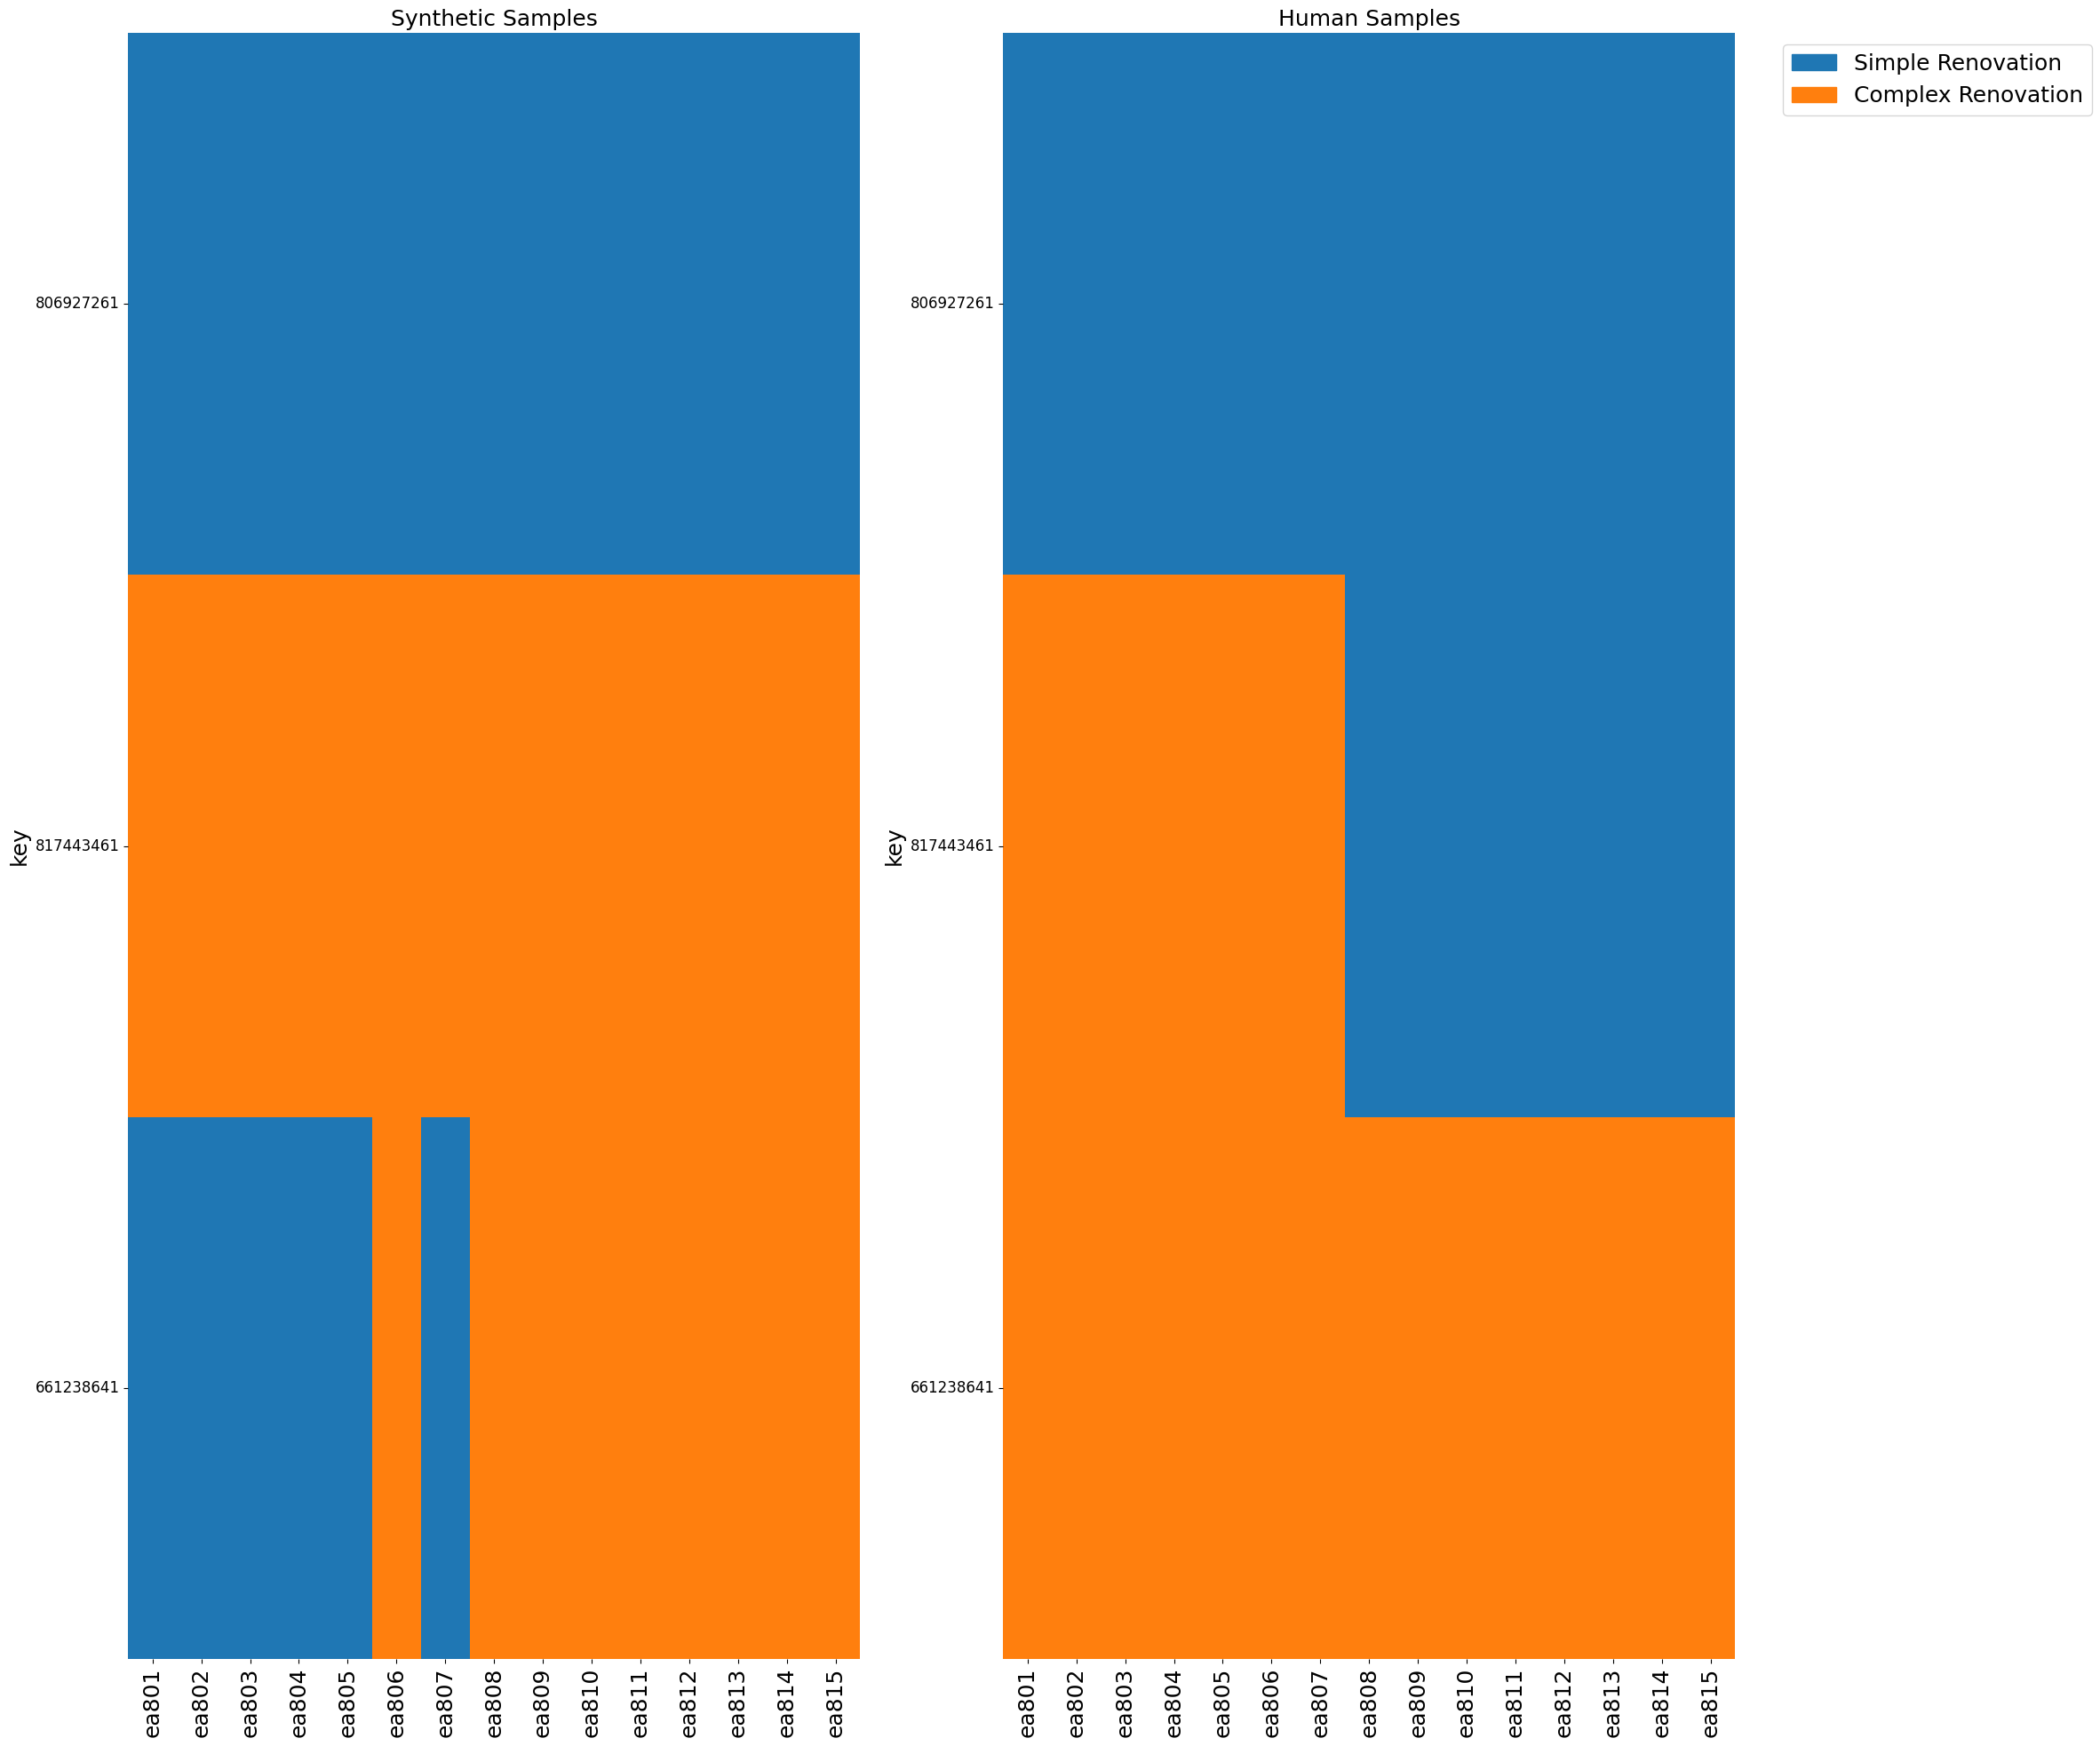

In [55]:
df_human_sample = df_sample[(df_sample['citizen_type']!='defier') & (df_sample['key'].isin([806927261, 661238641, 817443461]))].head(10)[['key']+final_columns]
output_file = '../../../data/ariadne/heating_buildings/experiment_1/20231230_1738/recurrent_gpt-3.5-turbo-t_0.5_qa.csv'
df_synthetic_samples = pd.read_csv(output_file)
df_synthetic_samples = df_synthetic_samples[(df_synthetic_samples['iter']==1)&(df_synthetic_samples['temperature']==0.5)][['key']+final_columns]
exp_run.compare_results(df_human_sample, df_synthetic_samples)

#### 3.2.3. Results temperature 0.5 iteration 3

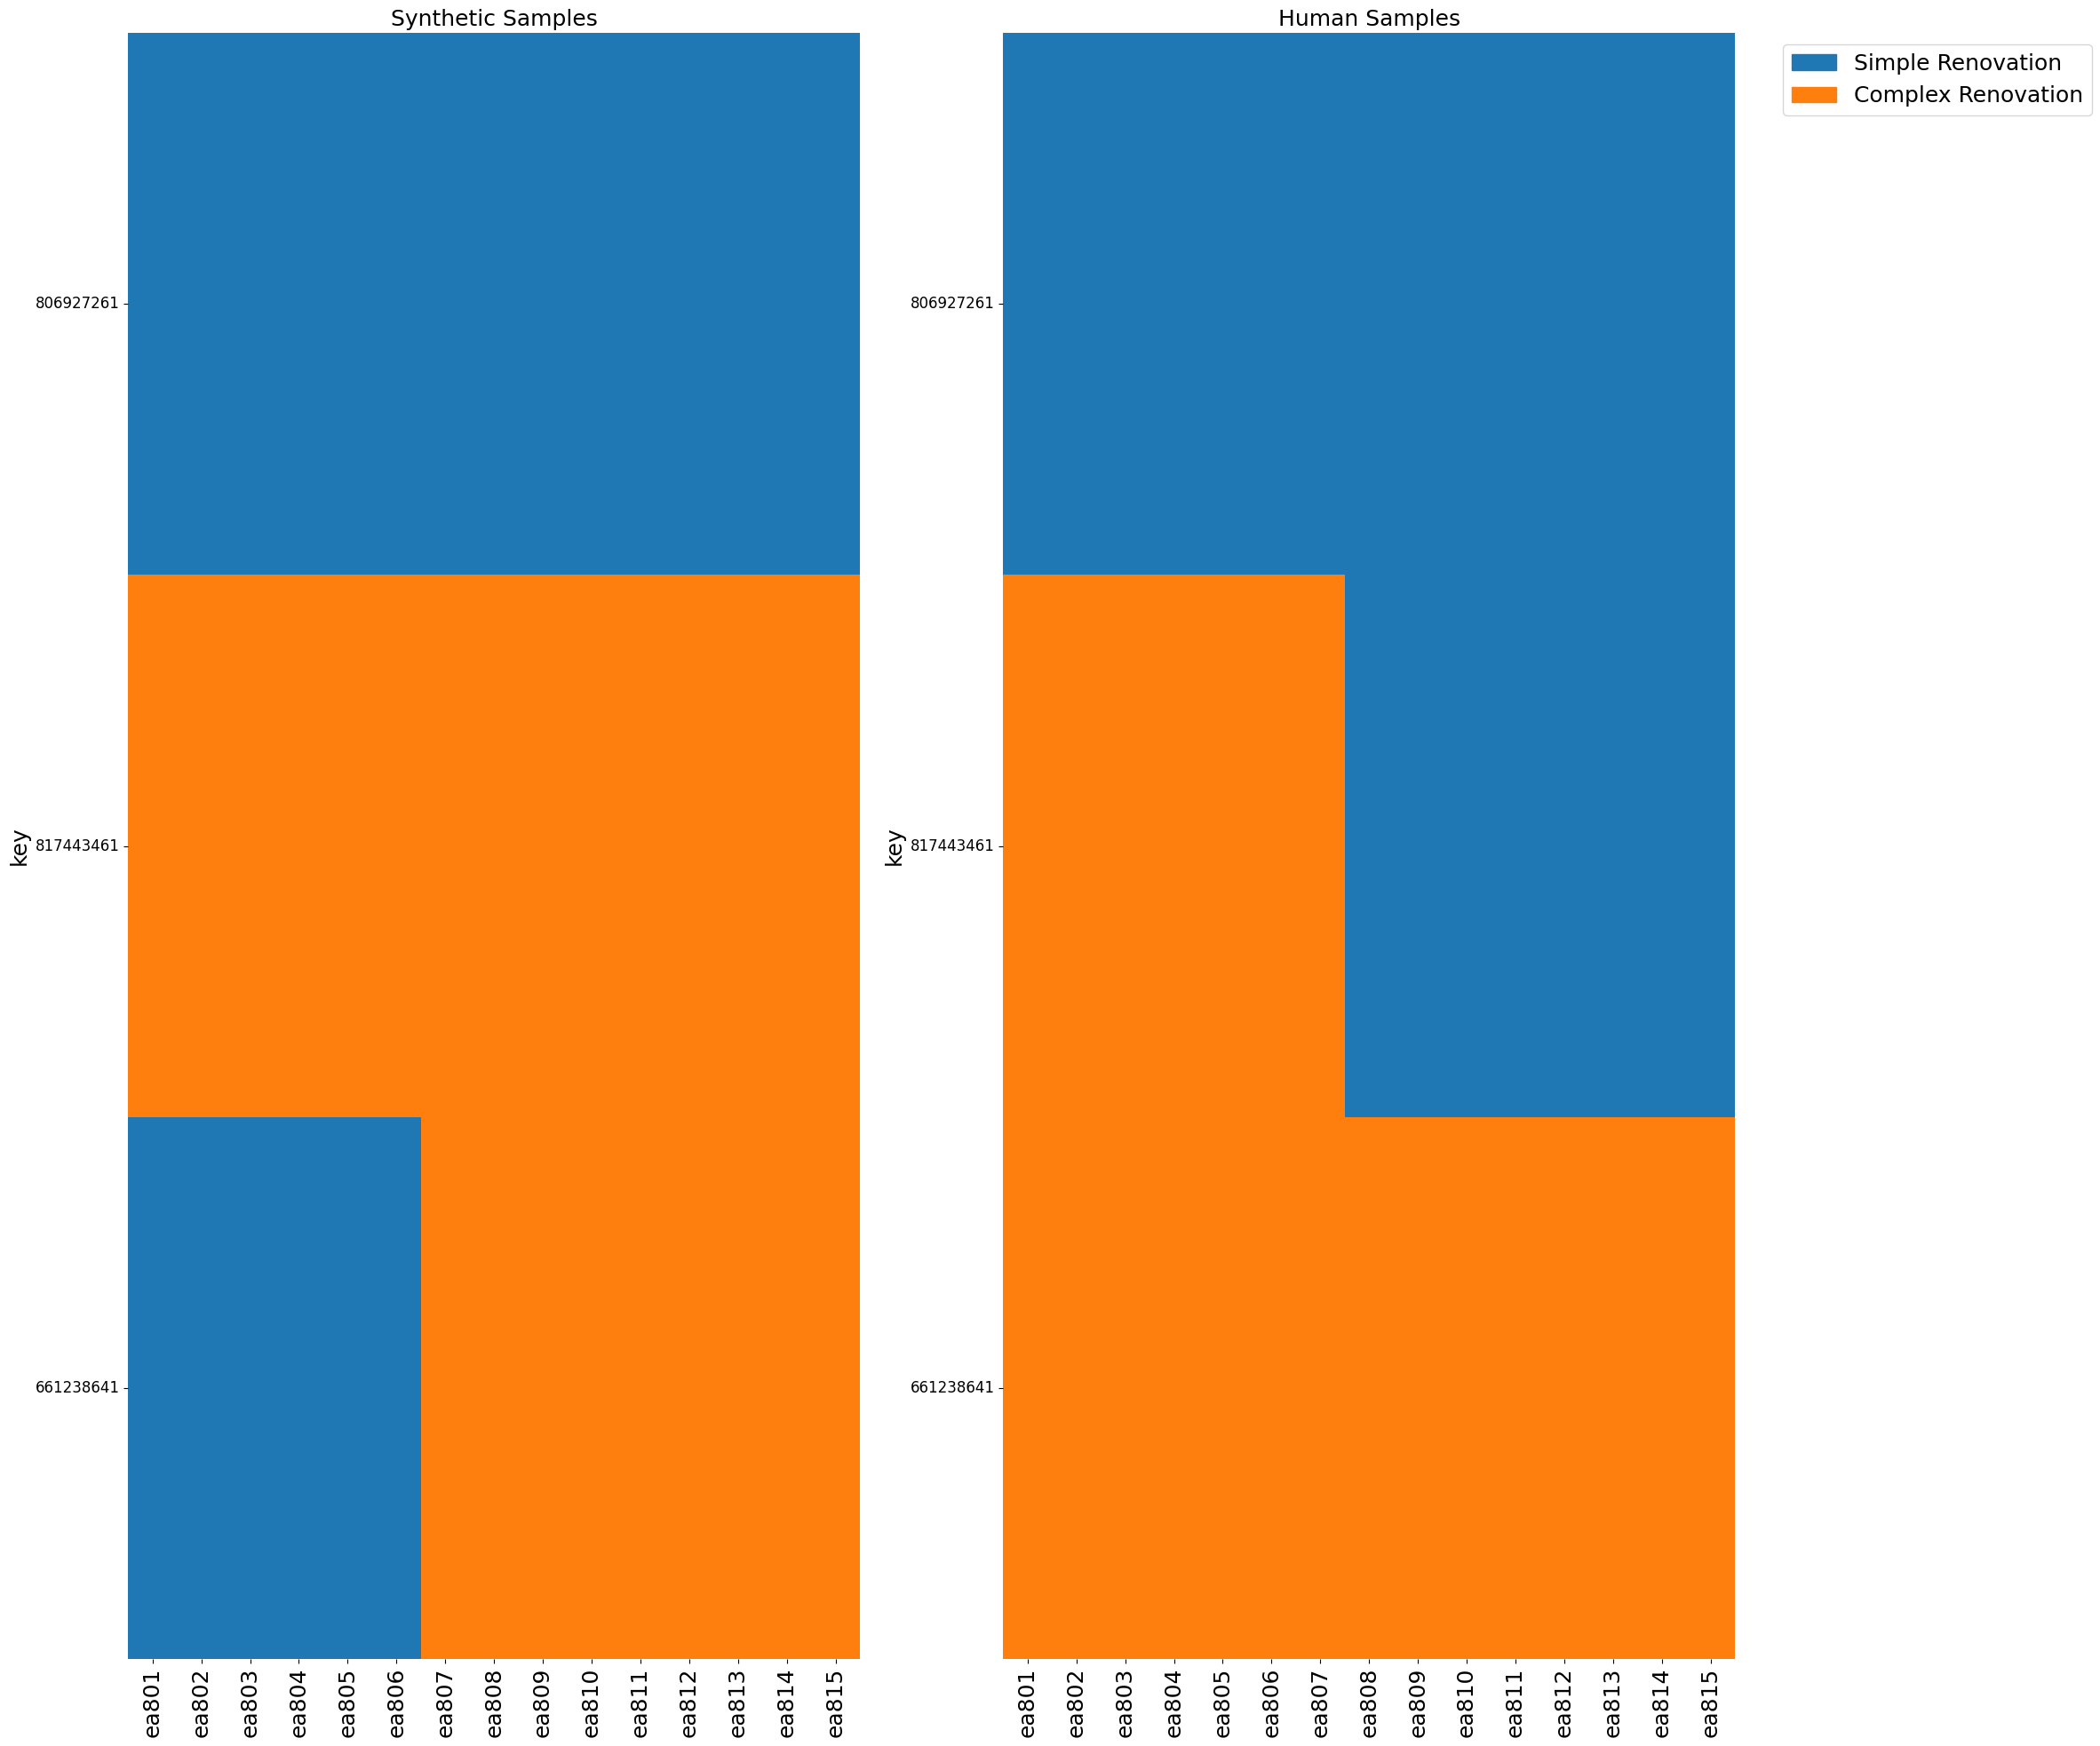

In [56]:
df_human_sample = df_sample[(df_sample['citizen_type']!='defier') & (df_sample['key'].isin([806927261, 661238641, 817443461]))].head(10)[['key']+final_columns]
output_file = '../../../data/ariadne/heating_buildings/experiment_1/20231230_1738/recurrent_gpt-3.5-turbo-t_0.5_qa.csv'
df_synthetic_samples = pd.read_csv(output_file)
df_synthetic_samples = df_synthetic_samples[(df_synthetic_samples['iter']==2)&(df_synthetic_samples['temperature']==0.5)][['key']+final_columns]
exp_run.compare_results(df_human_sample, df_synthetic_samples)

#### 3.3.1. Results temperature 0.7 iteration 1

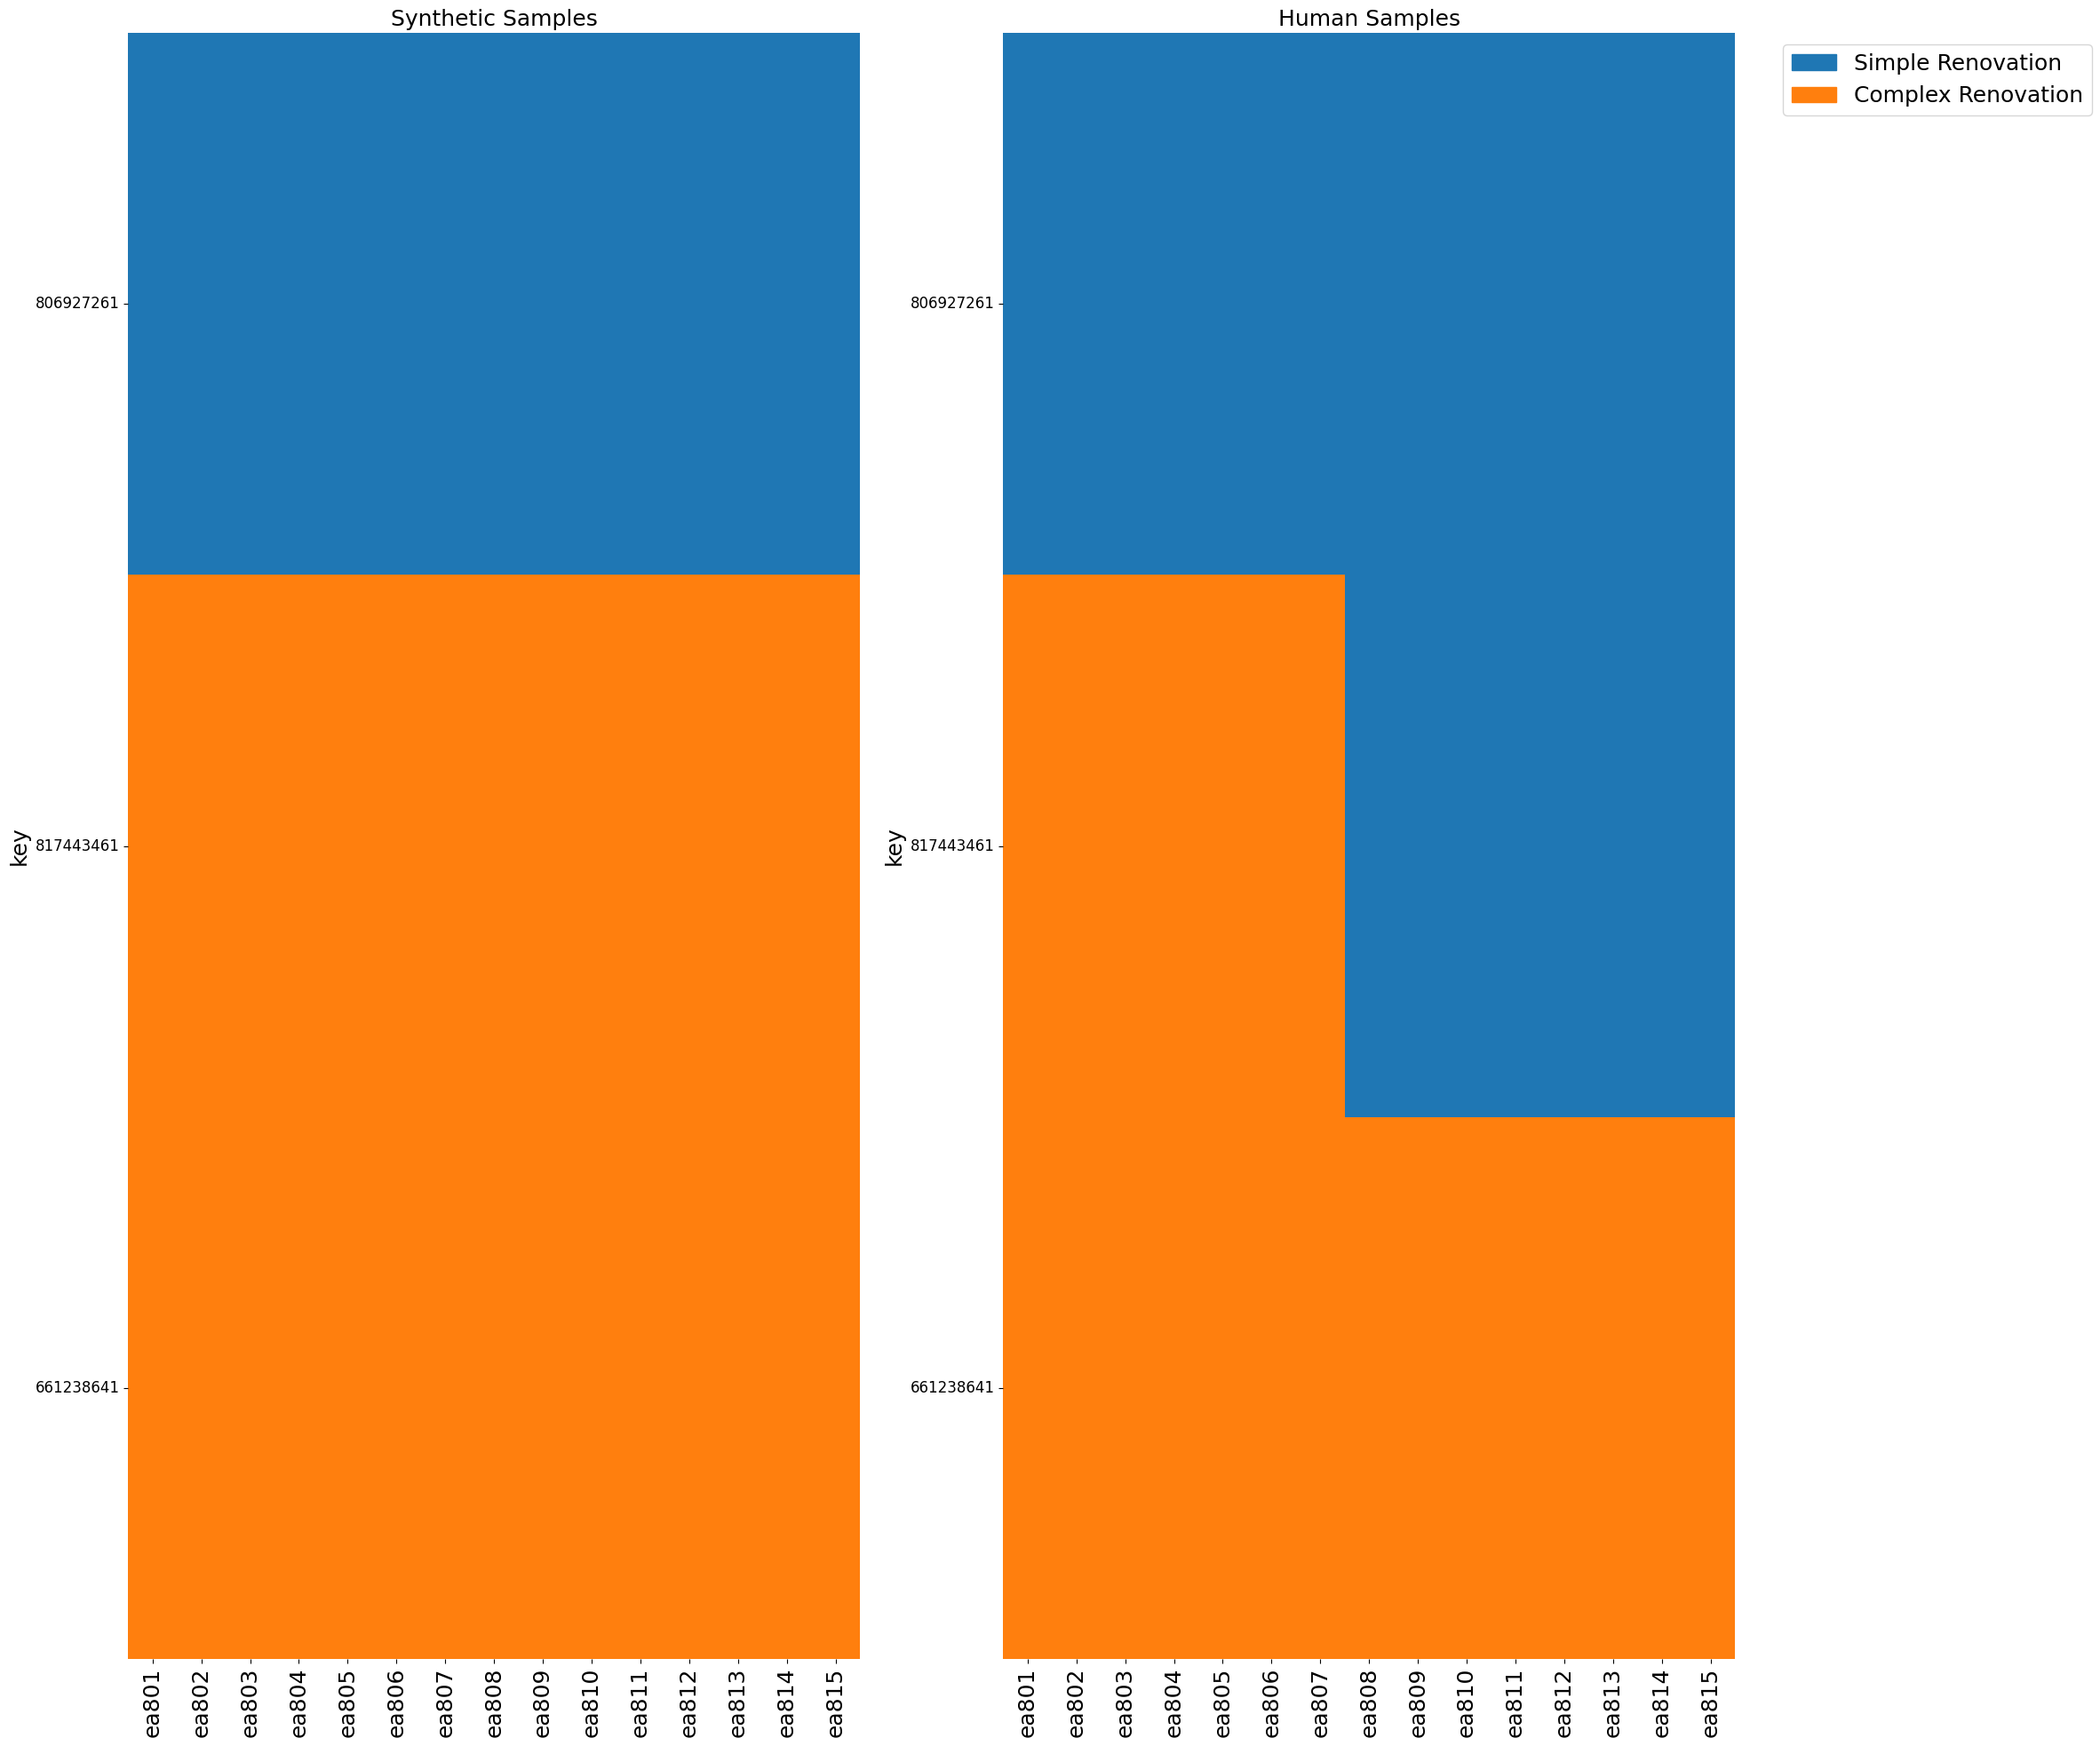

In [51]:
df_human_sample = df_sample[(df_sample['citizen_type']!='defier') & (df_sample['key'].isin([806927261, 661238641, 817443461]))].head(10)[['key']+final_columns]
output_file = '../../../data/ariadne/heating_buildings/experiment_1/20231230_1739/recurrent_gpt-3.5-turbo-t_0.7_qa.csv'
df_synthetic_samples = pd.read_csv(output_file)
df_synthetic_samples = df_synthetic_samples[(df_synthetic_samples['iter']==0)&(df_synthetic_samples['temperature']==0.7)][['key']+final_columns]
exp_run.compare_results(df_human_sample, df_synthetic_samples)

#### 3.3.2. Results temperature 0.7 iteration 2

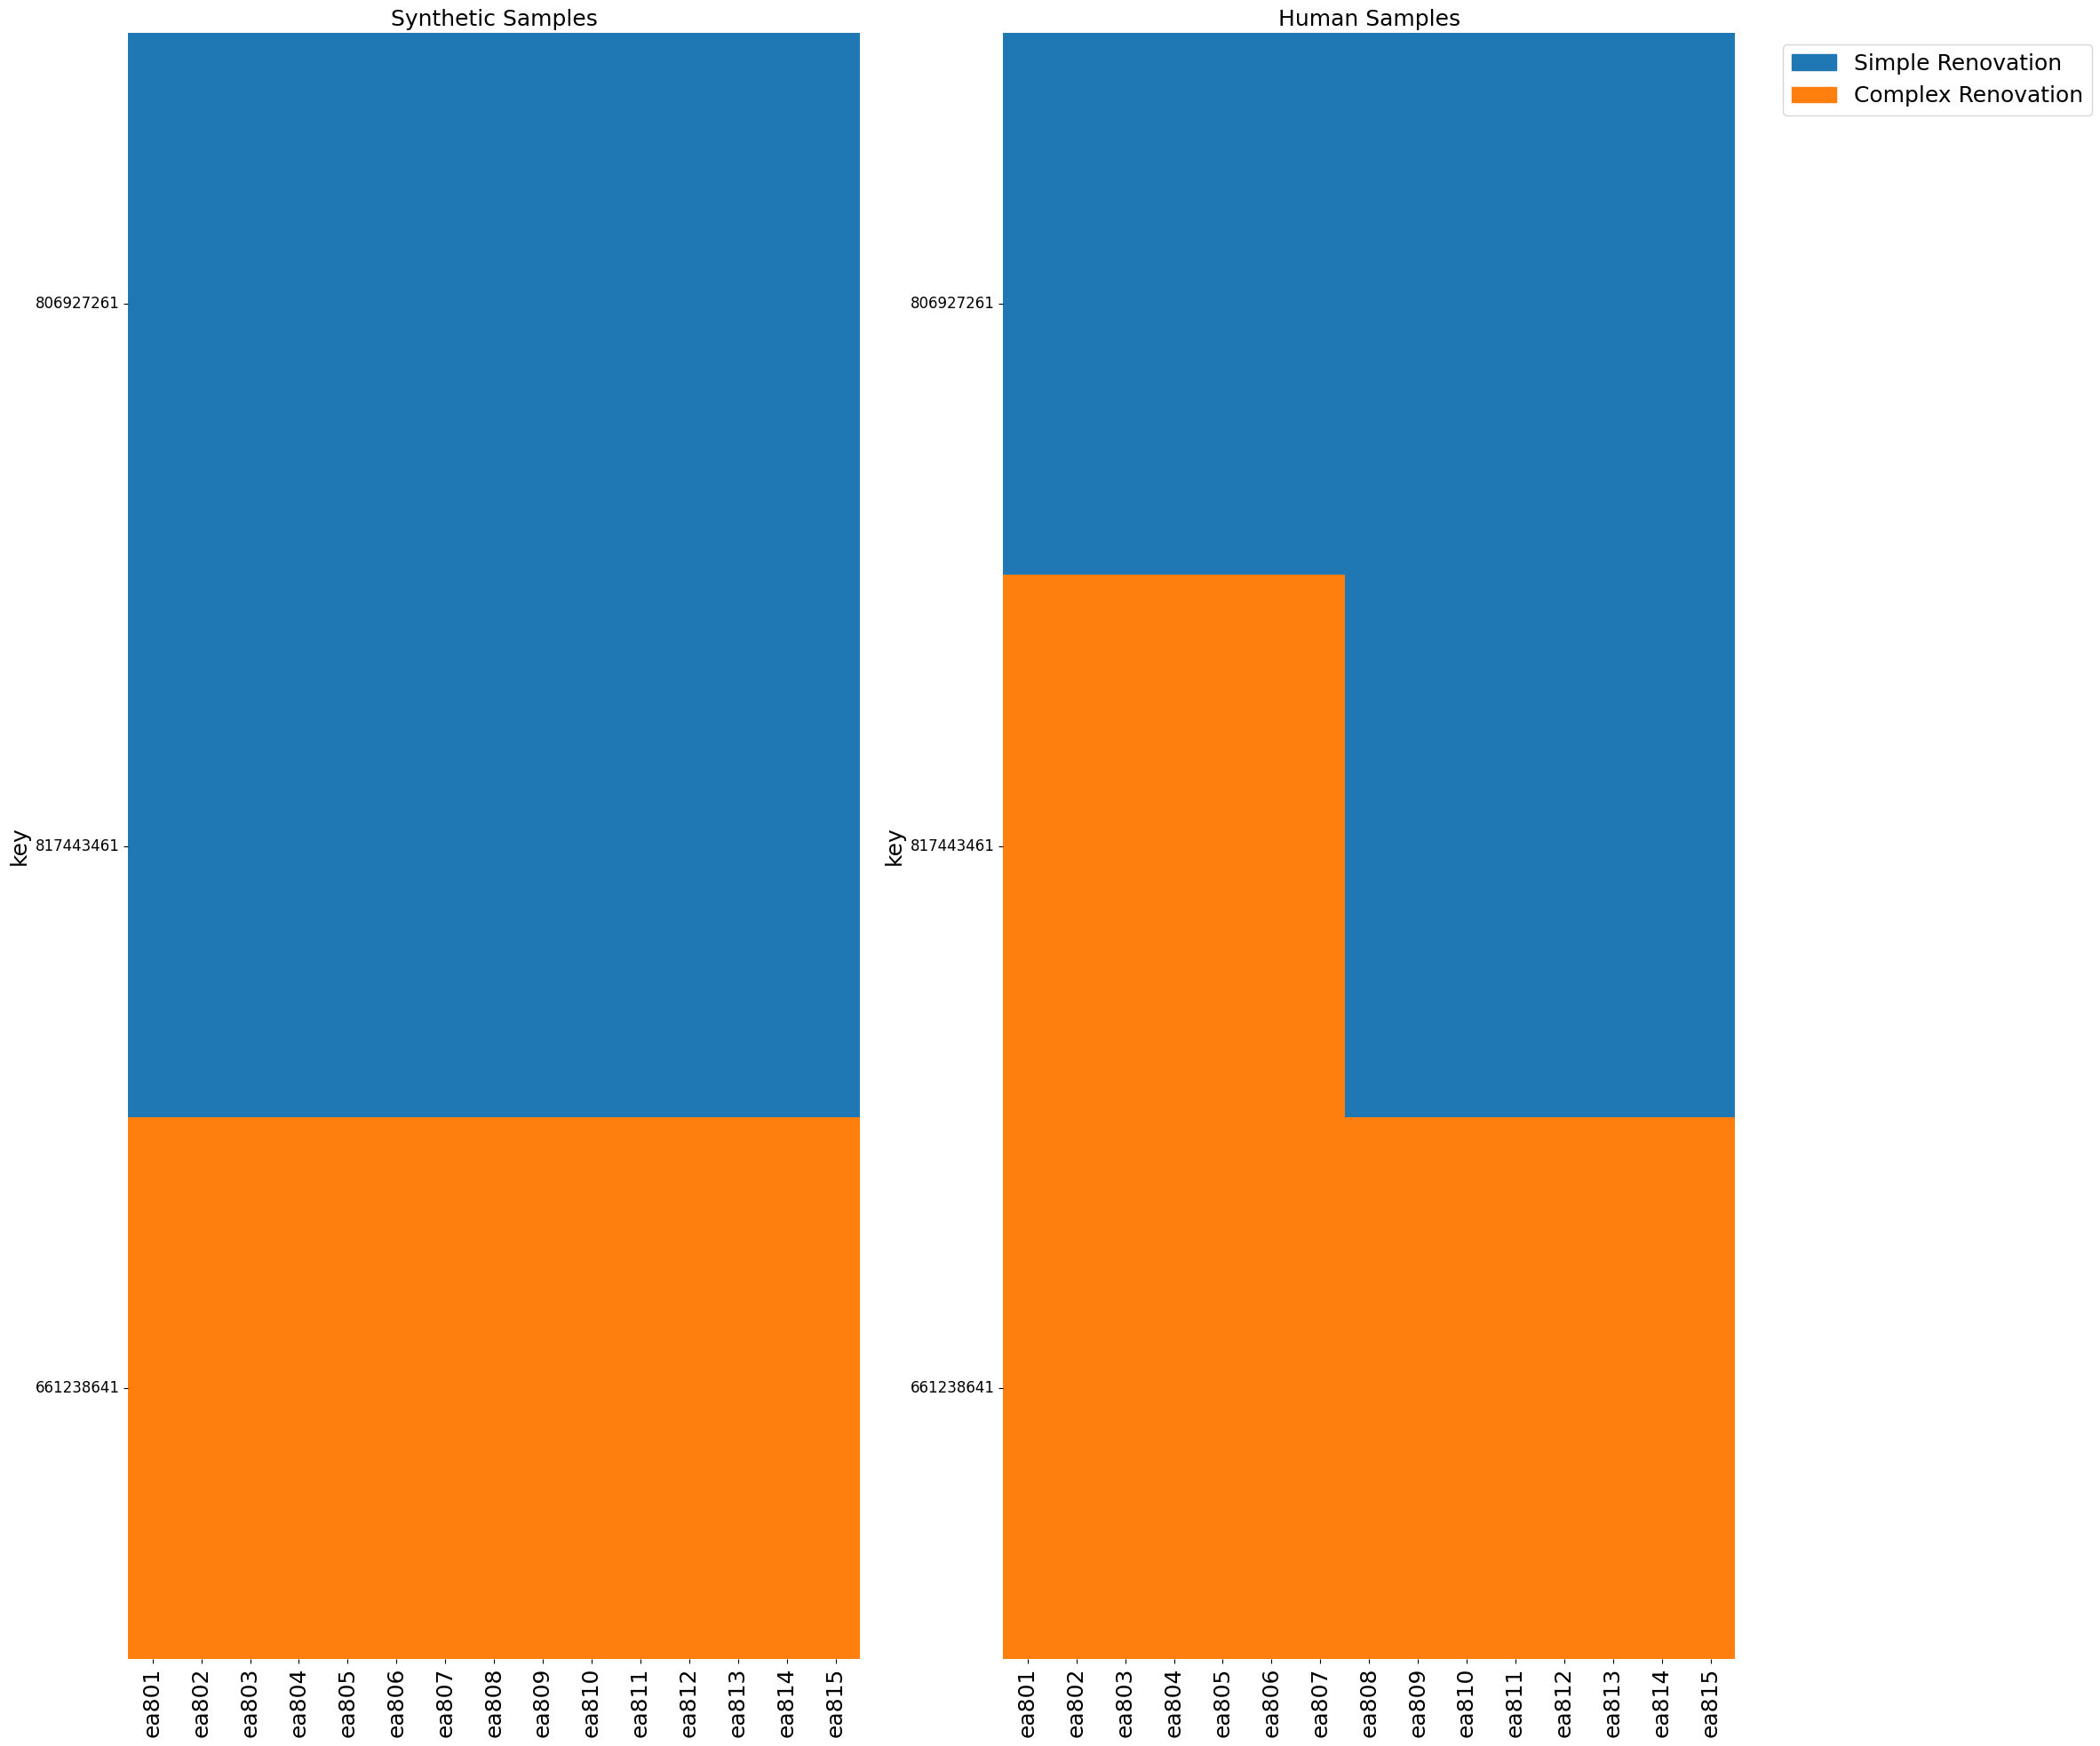

In [52]:
df_human_sample = df_sample[(df_sample['citizen_type']!='defier') & (df_sample['key'].isin([806927261, 661238641, 817443461]))].head(10)[['key']+final_columns]
output_file = '../../../data/ariadne/heating_buildings/experiment_1/20231230_1739/recurrent_gpt-3.5-turbo-t_0.7_qa.csv'
df_synthetic_samples = pd.read_csv(output_file)
df_synthetic_samples = df_synthetic_samples[(df_synthetic_samples['iter']==1)&(df_synthetic_samples['temperature']==0.7)][['key']+final_columns]
exp_run.compare_results(df_human_sample, df_synthetic_samples)

#### 3.3.3. Results temperature 0.7 iteration 3

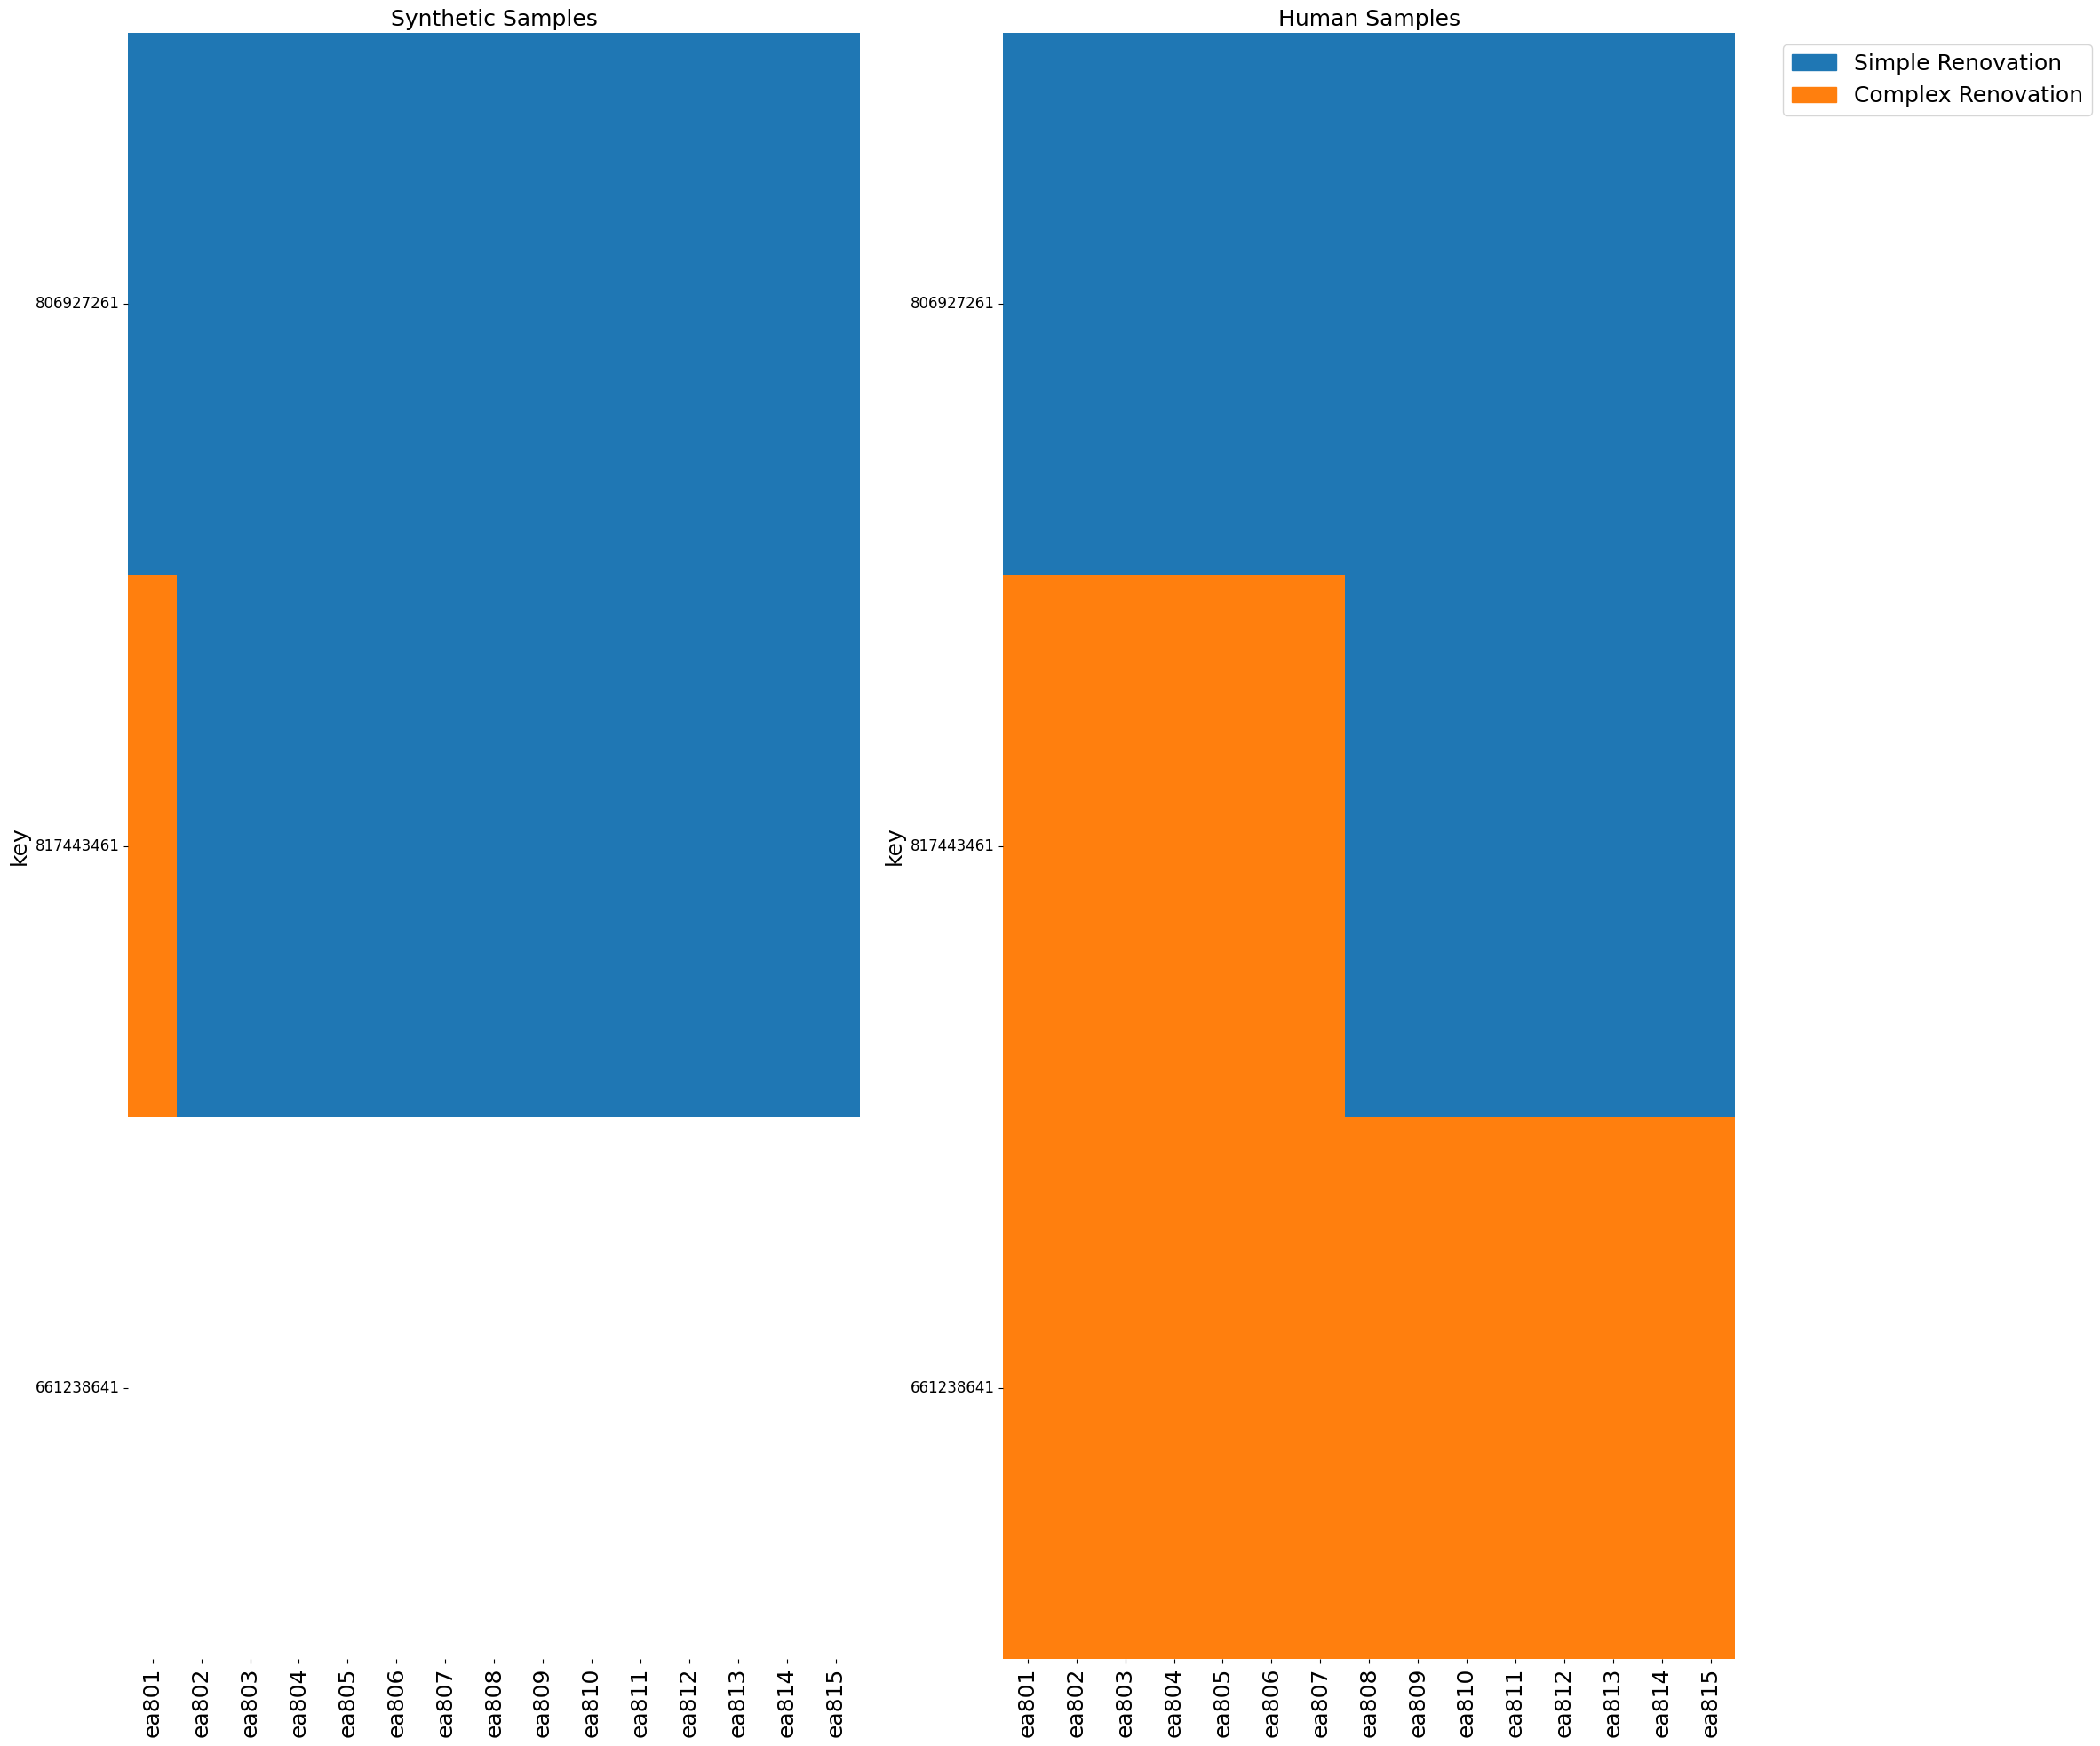

In [53]:
df_human_sample = df_sample[(df_sample['citizen_type']!='defier') & (df_sample['key'].isin([806927261, 661238641, 817443461]))].head(10)[['key']+final_columns]
output_file = '../../../data/ariadne/heating_buildings/experiment_1/20231230_1739/recurrent_gpt-3.5-turbo-t_0.7_qa.csv'
df_synthetic_samples = pd.read_csv(output_file)
df_synthetic_samples = df_synthetic_samples[(df_synthetic_samples['iter']==2)&(df_synthetic_samples['temperature']==0.7)][['key']+final_columns]
exp_run.compare_results(df_human_sample, df_synthetic_samples)

#### 3.4.1. Results temperature 1.0 iteration 1

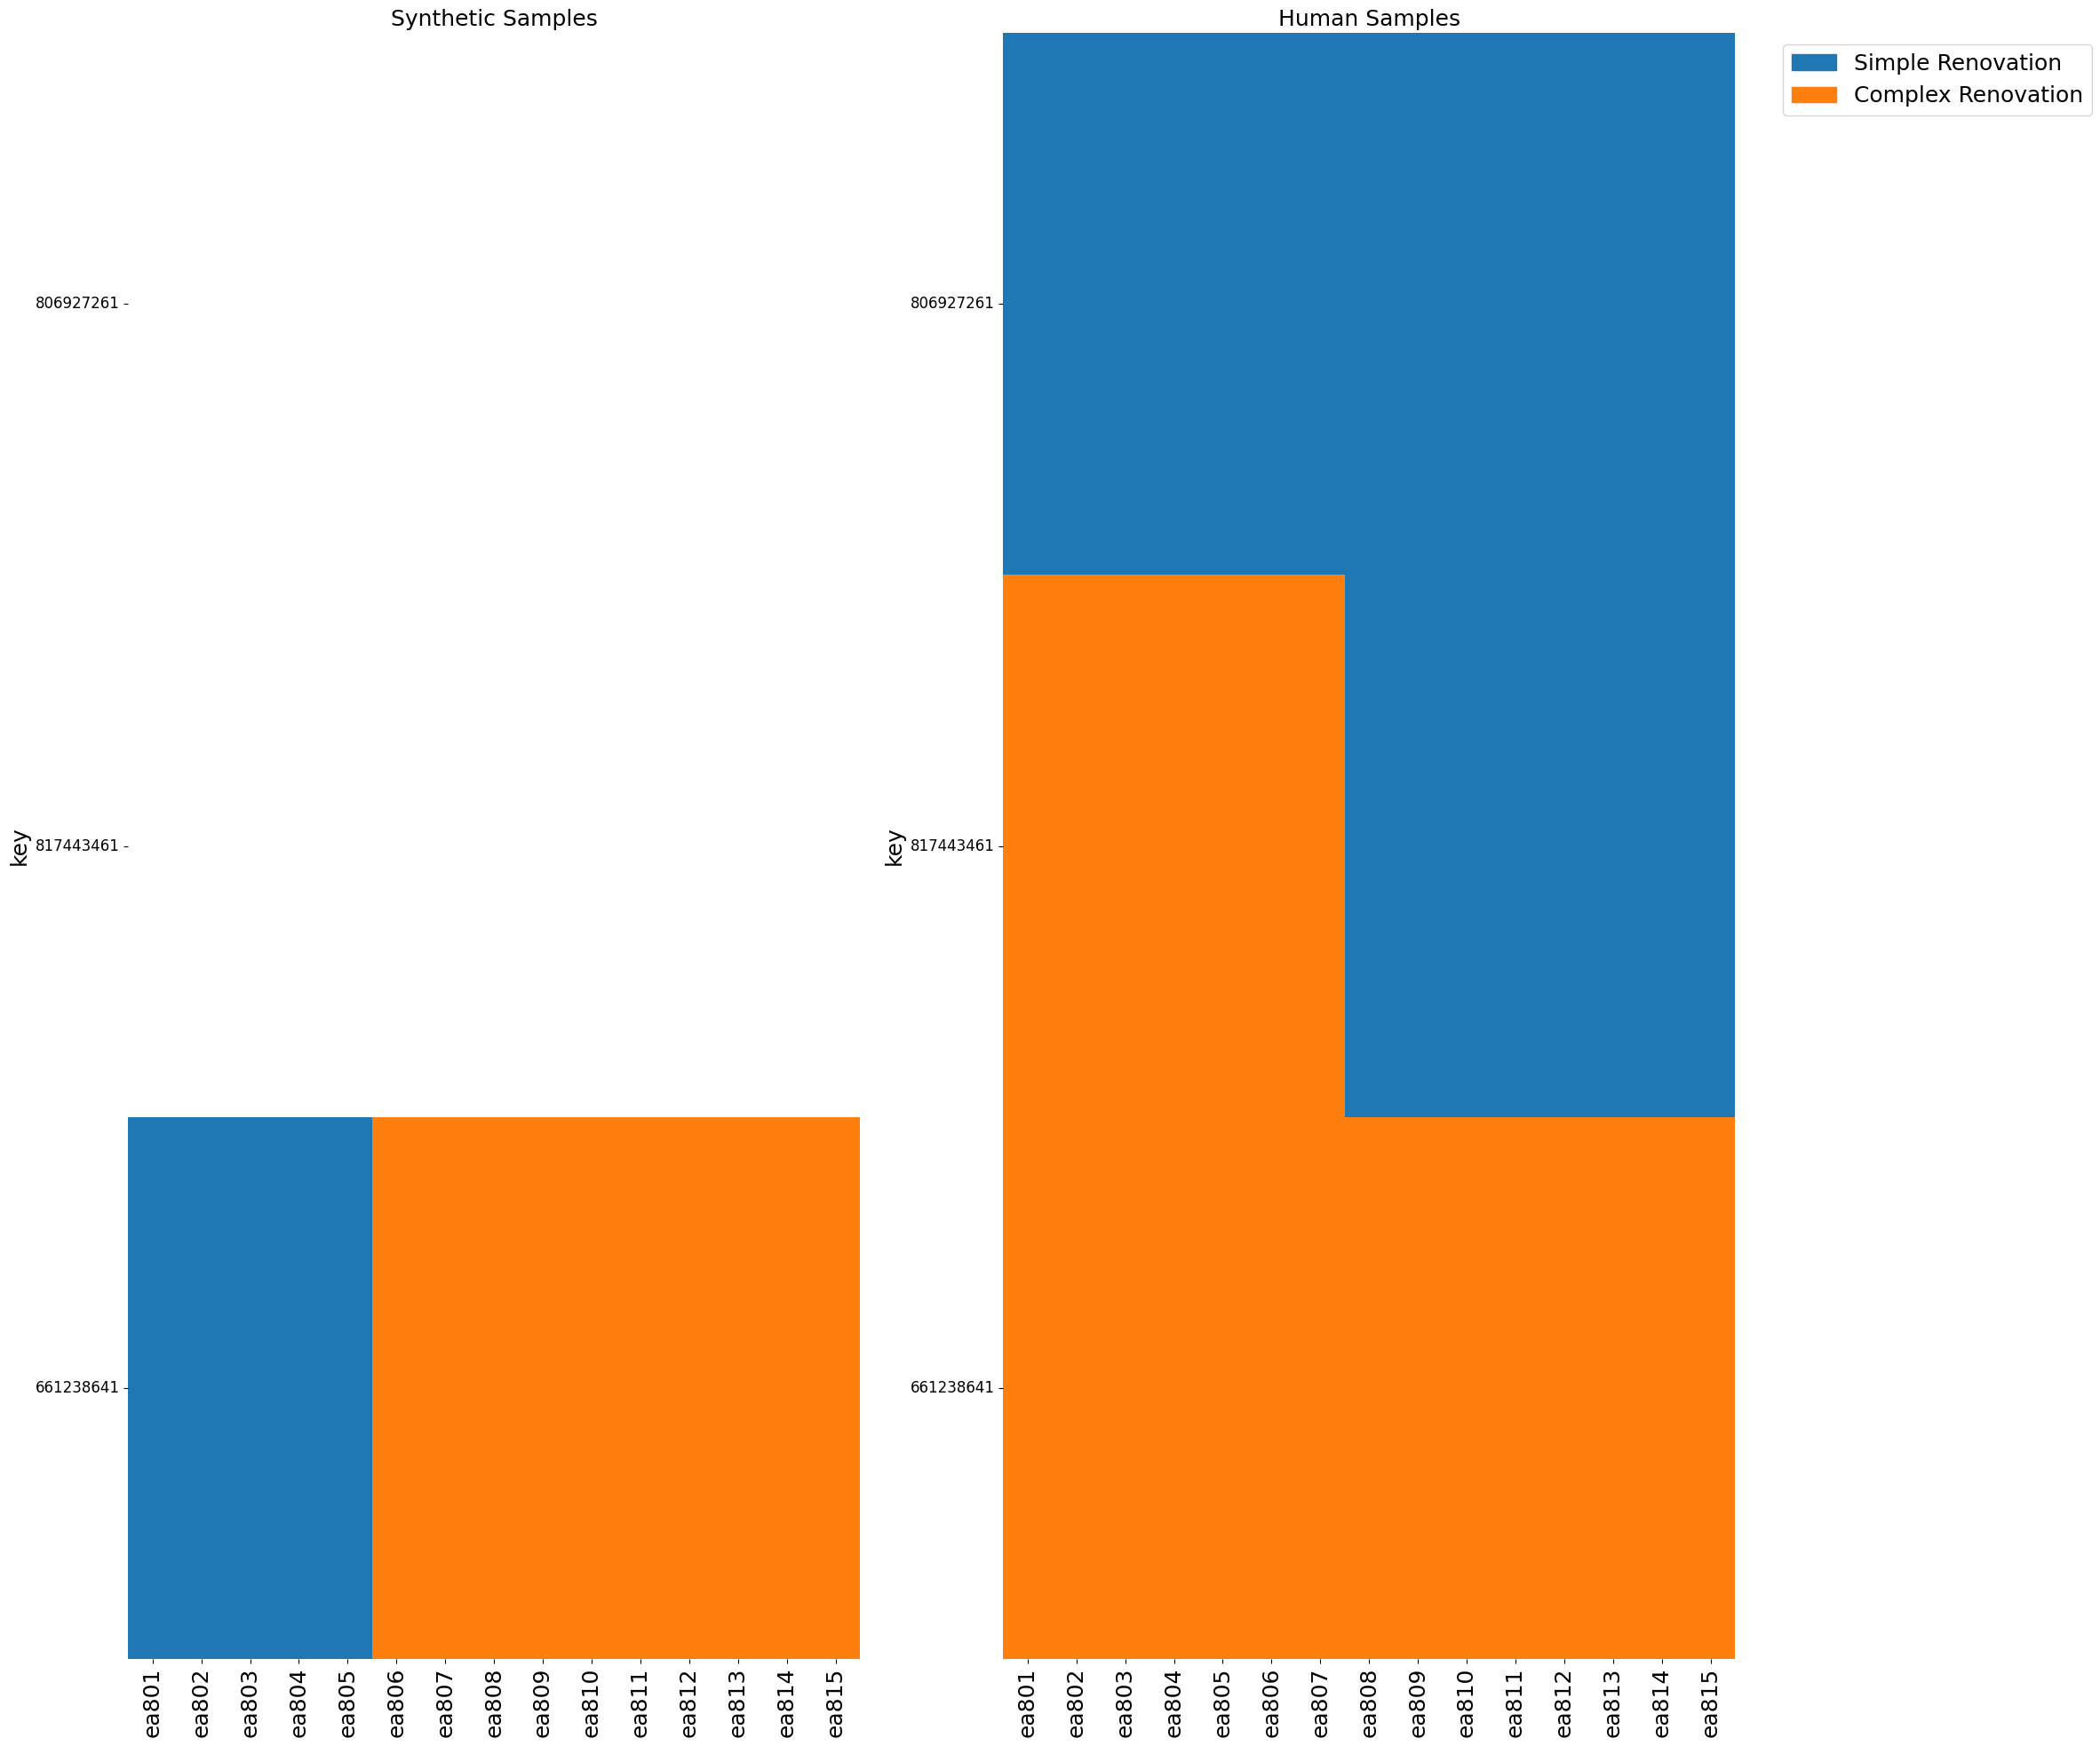

In [47]:
df_human_sample = df_sample[(df_sample['citizen_type']!='defier') & (df_sample['key'].isin([806927261, 661238641, 817443461]))].head(10)[['key']+final_columns]
output_file = '../../../data/ariadne/heating_buildings/experiment_1/20231229_1307/recurrent_gpt-3.5-turbo-t_1.0_qa.csv'
df_synthetic_samples = pd.read_csv(output_file)
df_synthetic_samples = df_synthetic_samples[(df_synthetic_samples['iter']==0)&(df_synthetic_samples['temperature']==1.0)][['key']+final_columns]
exp_run.compare_results(df_human_sample, df_synthetic_samples)

#### 3.4.2. Results temperature 1.0 iteration 2

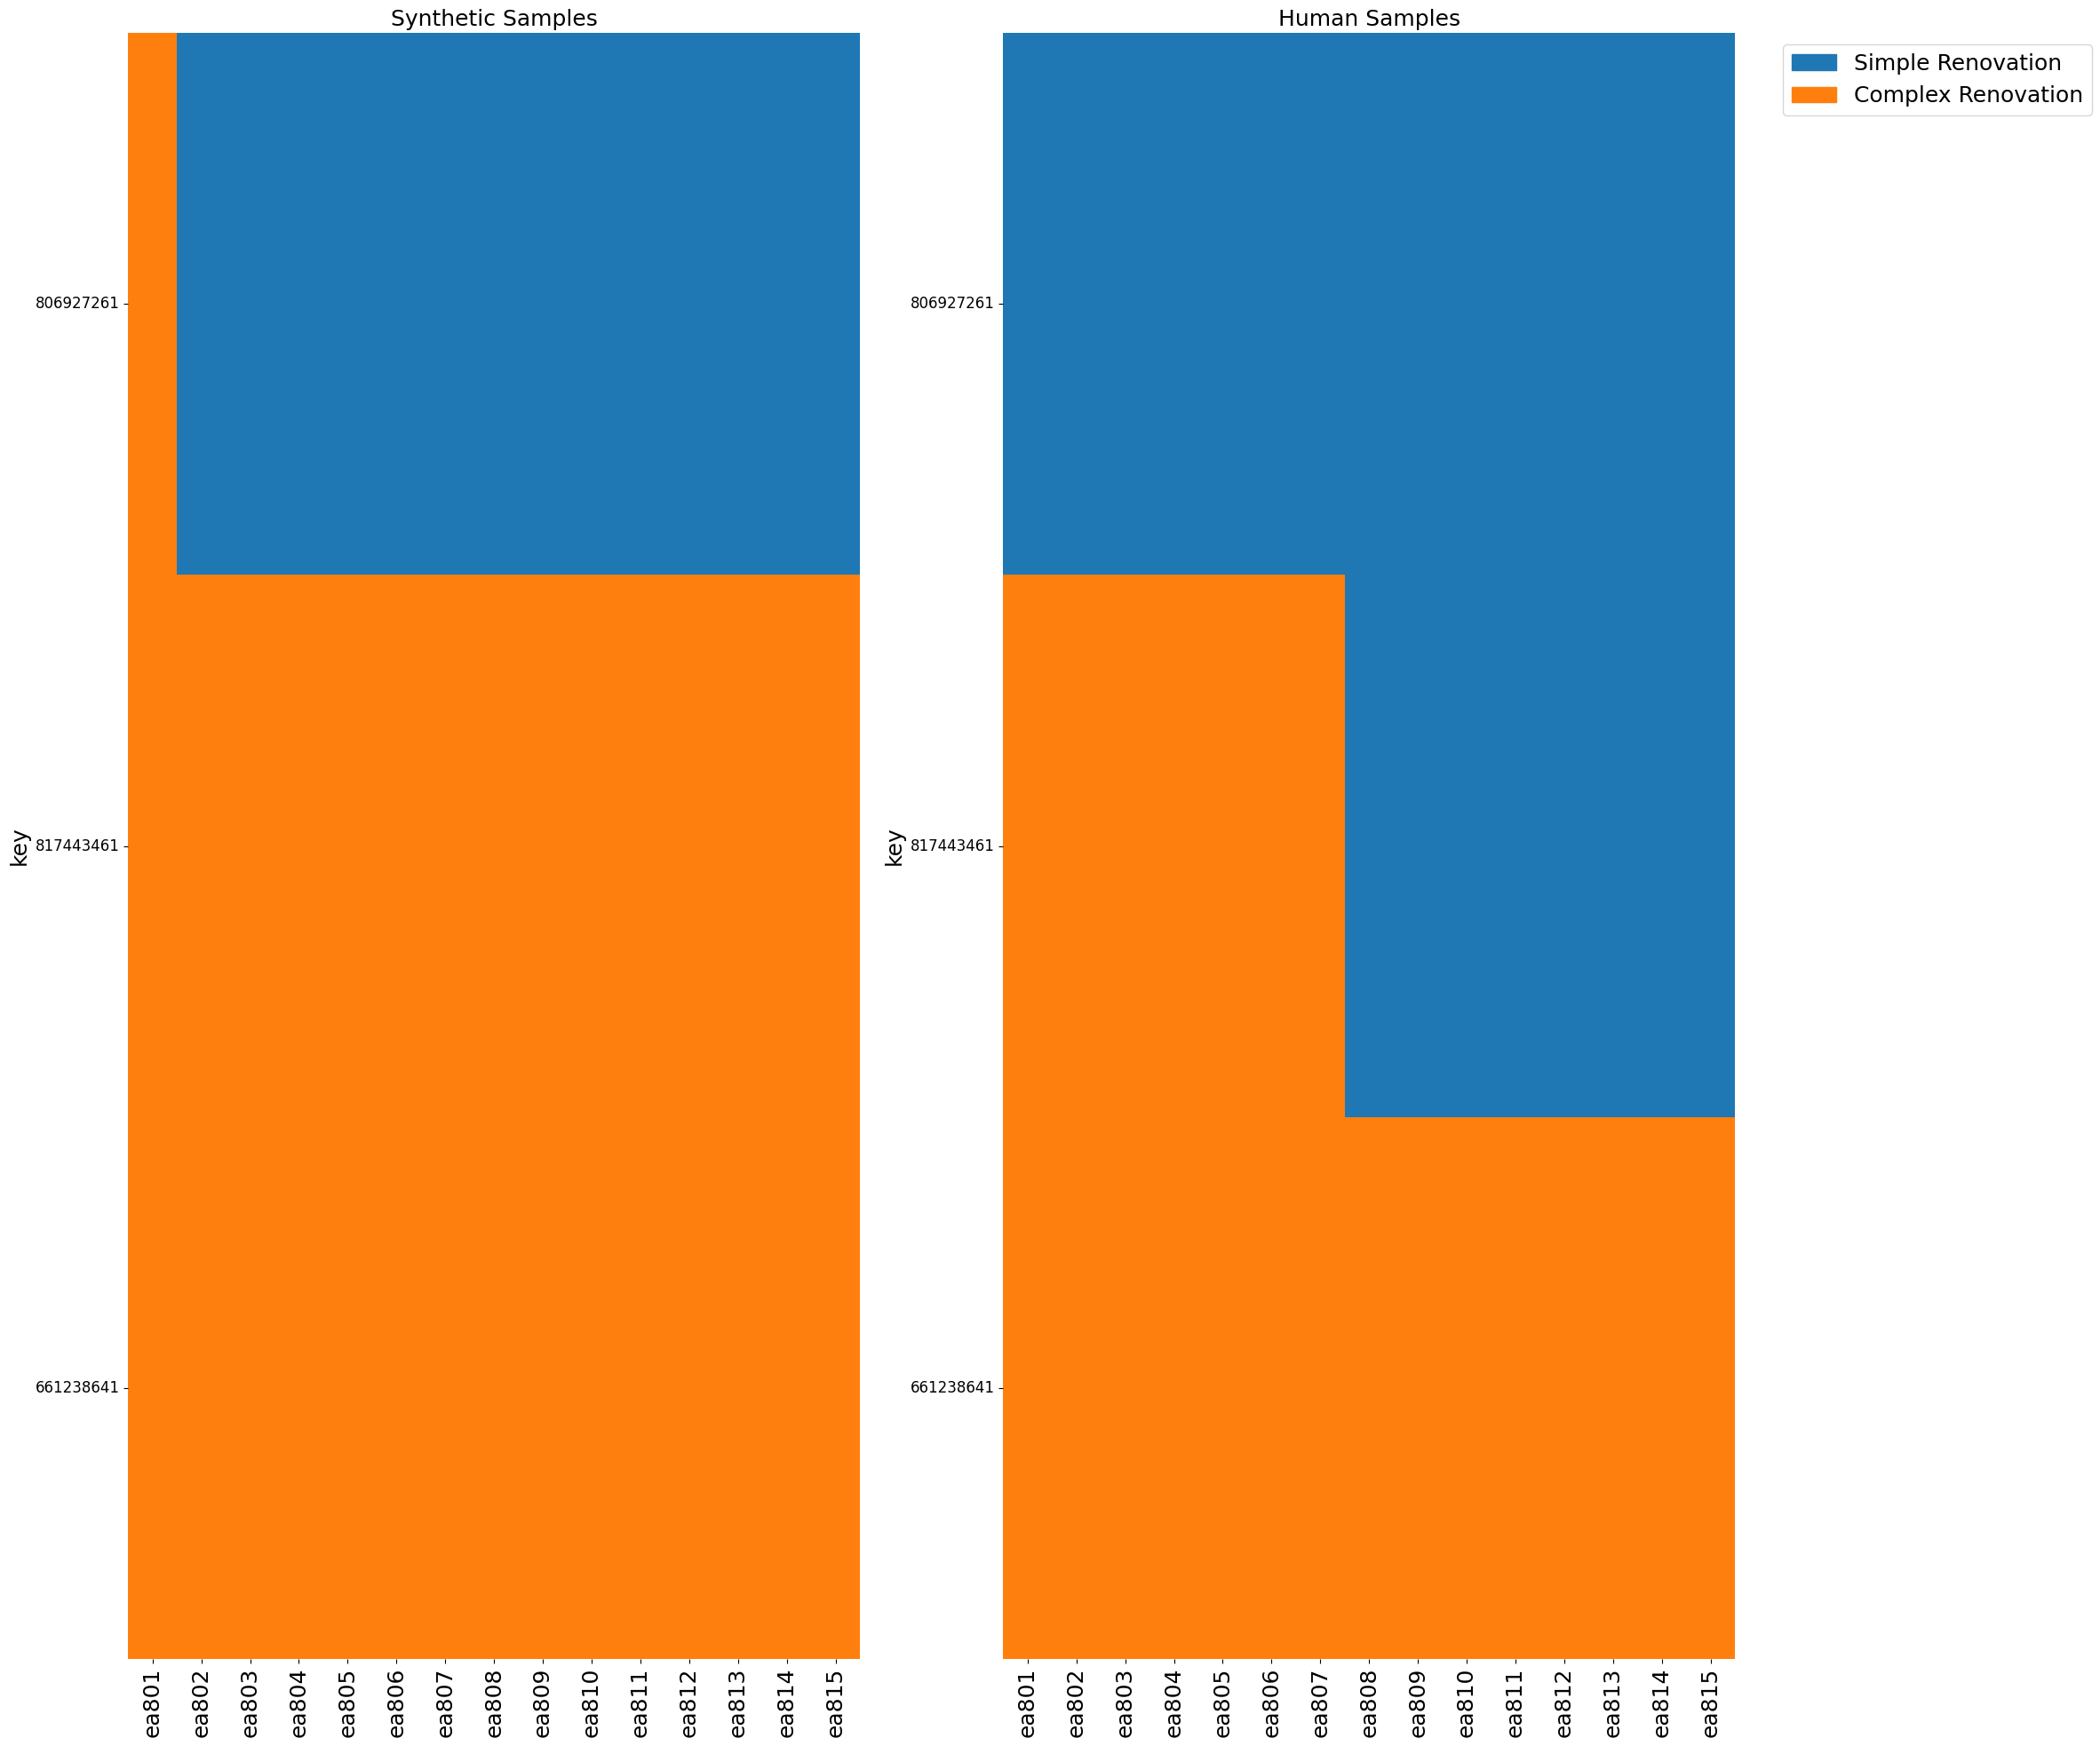

In [27]:
df_human_sample = df_sample[(df_sample['citizen_type']!='defier') & (df_sample['key'].isin([806927261, 661238641, 817443461]))].head(10)[['key']+final_columns]
output_file = '../../../data/ariadne/heating_buildings/experiment_1/20231229_1307/recurrent_gpt-3.5-turbo-t_1.0_qa.csv'
df_synthetic_samples = pd.read_csv(output_file)
df_synthetic_samples = df_synthetic_samples[(df_synthetic_samples['iter']==1)&(df_synthetic_samples['temperature']==1.0)][['key']+final_columns]
exp_run.compare_results(df_human_sample, df_synthetic_samples)

#### 3.4.3. Results temperature 1.0 iteration 3

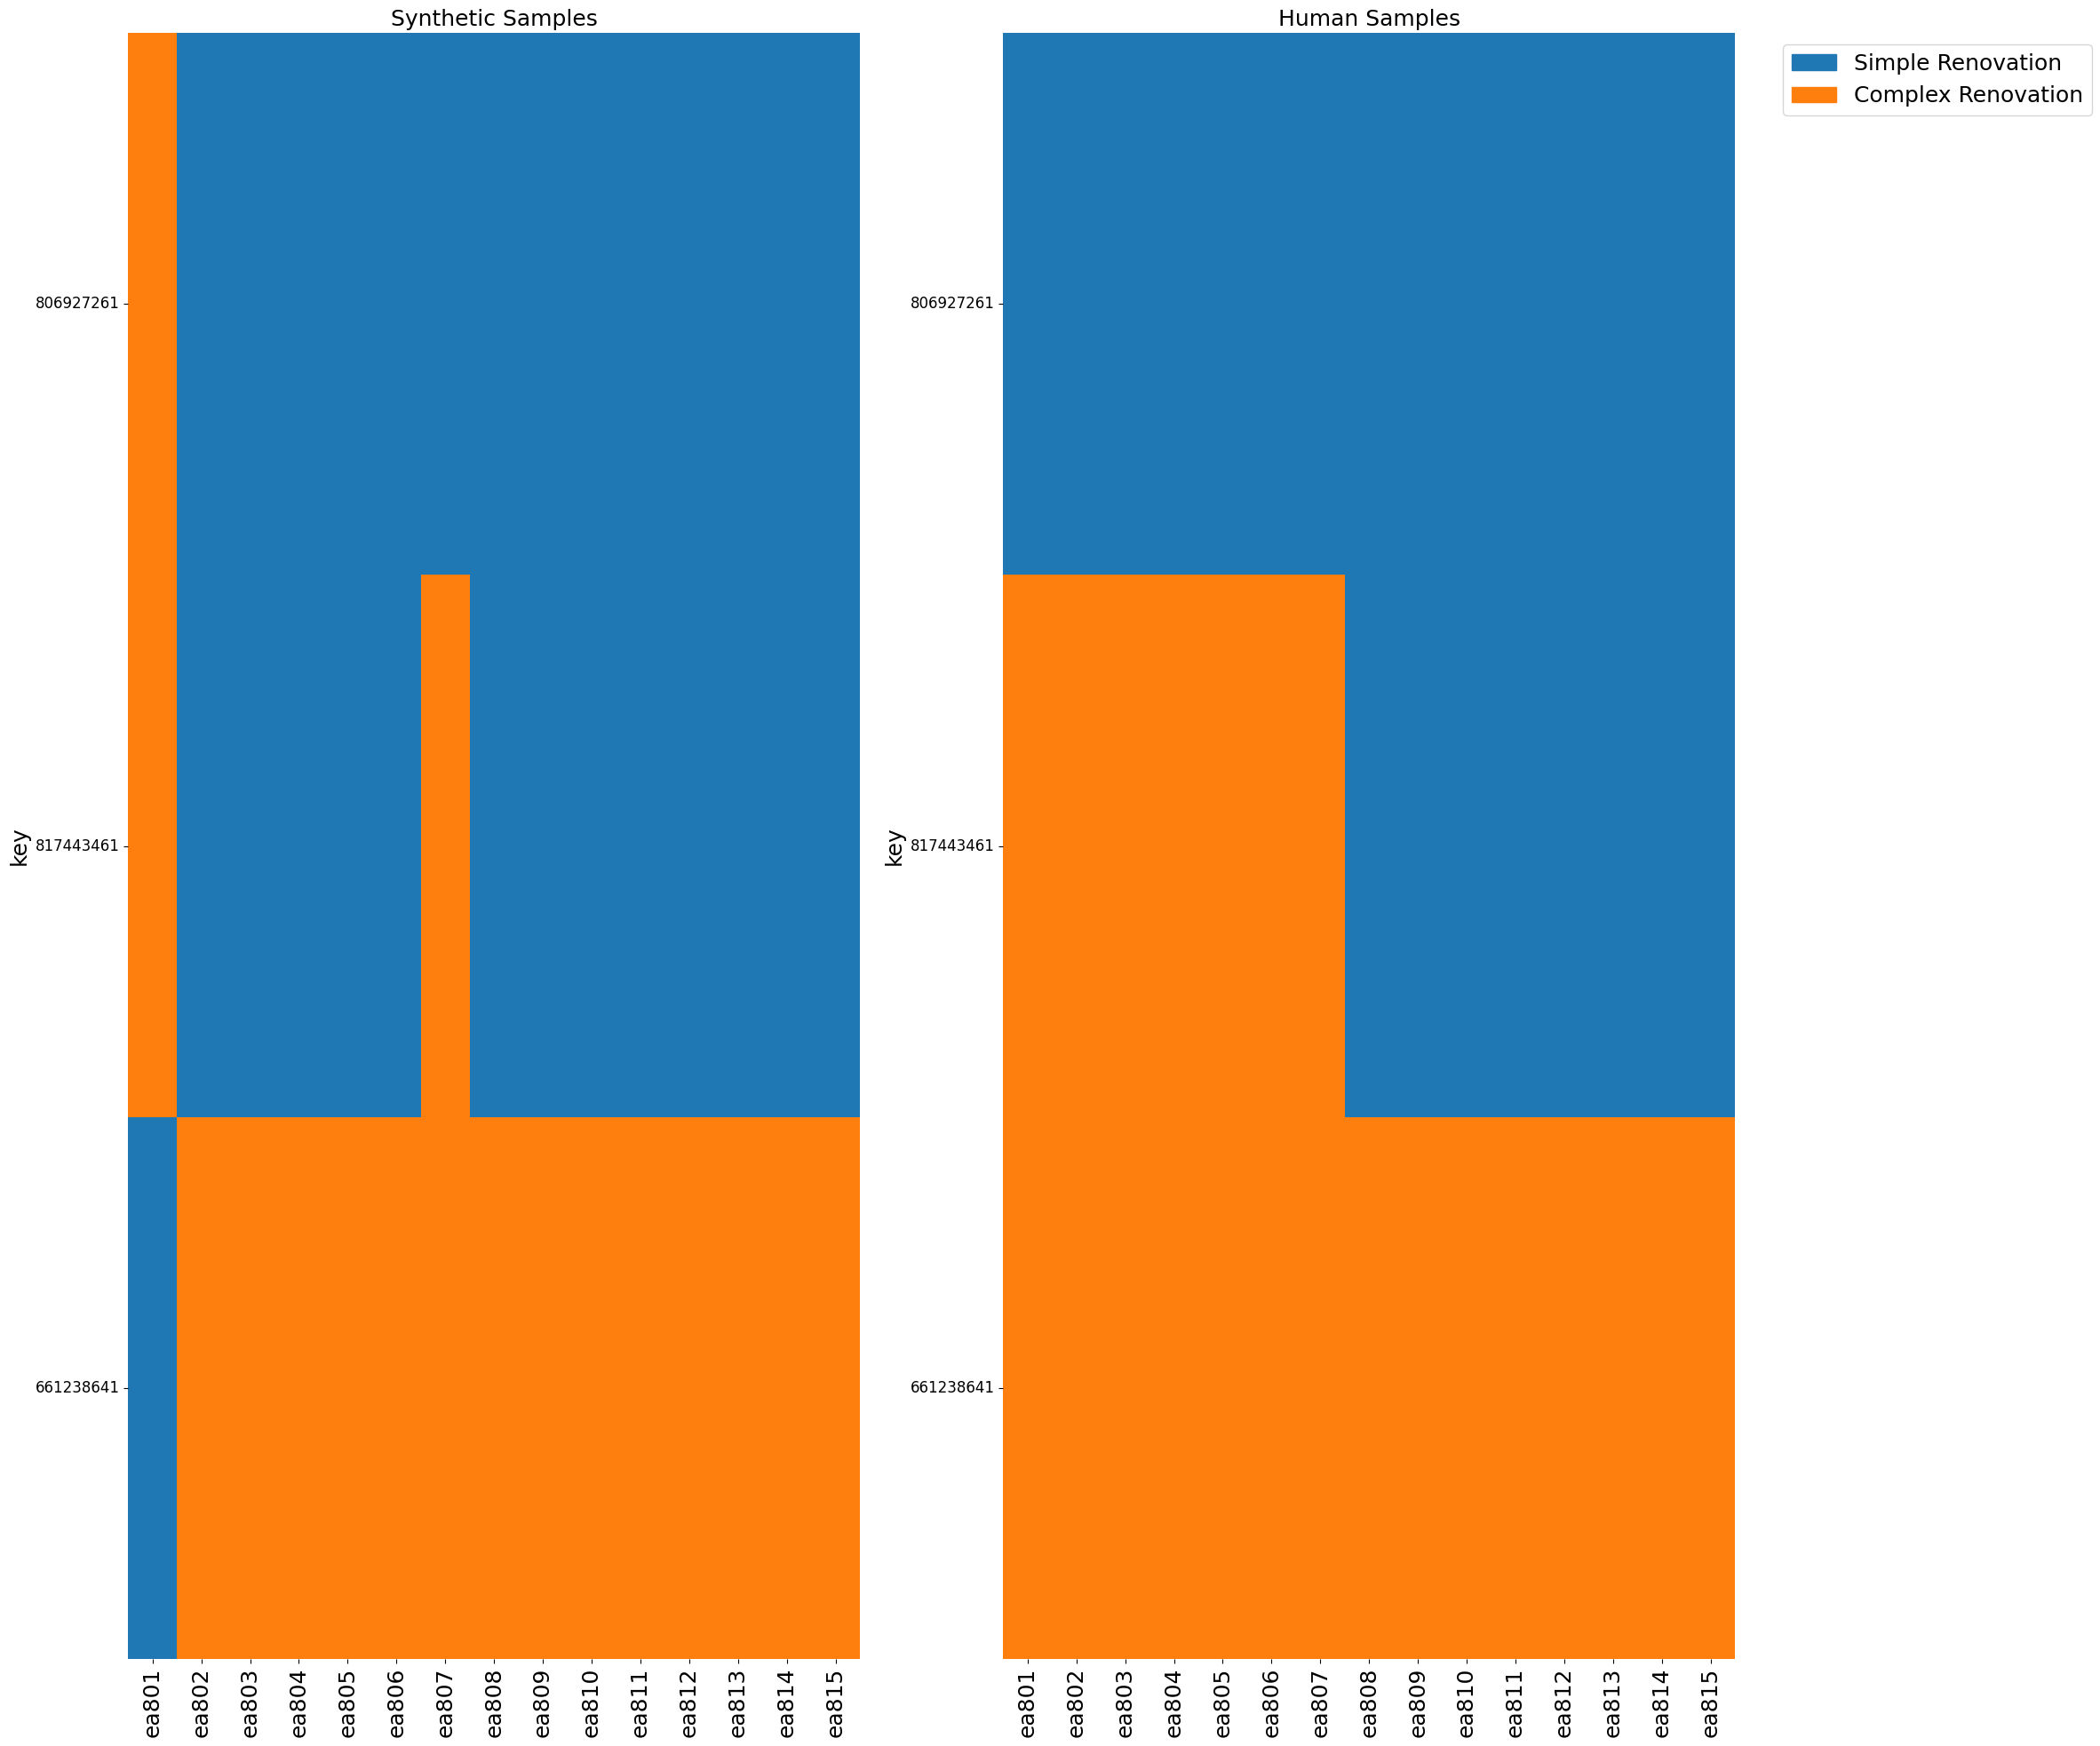

In [28]:
df_human_sample = df_sample[(df_sample['citizen_type']!='defier') & (df_sample['key'].isin([806927261, 661238641, 817443461]))].head(10)[['key']+final_columns]
output_file = '../../../data/ariadne/heating_buildings/experiment_1/20231229_1307/recurrent_gpt-3.5-turbo-t_1.0_qa.csv'
df_synthetic_samples = pd.read_csv(output_file)
df_synthetic_samples = df_synthetic_samples[(df_synthetic_samples['iter']==2)&(df_synthetic_samples['temperature']==1.0)][['key']+final_columns]
exp_run.compare_results(df_human_sample, df_synthetic_samples)